In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


1. Importing Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_health = pd.read_csv('/content/drive/My Drive/MCM Practicum/health.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2503) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Data Preprocessing**

**Here we are dropping some column which are having more than 40 percent of data missing.**

In [ ]:
remove_columns = ['Unnamed: 0','QUESTID2','filedate','cigofrsm','cigofrsm','cigwilyr','cigyfu','cigmfu',	'cigrec','cigdlyfu','cigdlmfu','alcyfu','alcmfu','altotfg','alfqflg',
                  'aldaypyr','AL30EST','aldysfg','mrtotfg','mjfqflg','cctotfg','ccfqflg','crtotfg','crfqflg','hrtotfg','hrfqflg','haltotfg','halfqflg','inhtotfg','inhfqflg',
                  'pnrnorxfg','trqnorxfg','stmnorxfg','sednorxfg','ircgrrc','irpiplf','iimjfy','II2MJFY','II2COCFY','iicrkfy','II2CRKFY','iiherfy','II2HERFY','iihallucyfq',
                  'iiinhalyfq','iimethamyfq','iicigfm','II2CIGFM','iicgrfm','II2CGRFM','IISMKLSS30N','iialcfm','IIALCBNG30D','IITRQNM30FQ','IISTMNM30FQ','iimjfm','II2MJFM','iicocfm',
                  'II2COCFM','II2ALCFM','iiherfm',	'IIHALLUC30N','IIINHAL30N','IIMETHAM30N','IIPNRNM30FQ','II2HERFM','IISTMNM30FQ','IISEDNM30FQ','iicigage',
                  'iicigyfu','iicduage','IICD2YFU','iicgrage','iicgryfu','iismklsstry','iismklssyfu','iimjage','iimjyfu','iicocage','iicocyfu','iicrkage','iicrkyfu','iiherage',
                  'iiheryfu','iihallucage','iihallucyfu','iilsdage','iilsdyfu','iipcpage','iipcpyfu','iiecstmoage','iiecstmoyfu','iiinhalage','iiinhalyfu','iimethamage','iimethamyfu'
                  ,'yeatndyr','yehmslyr','yeschflt','yeschimp','iipnrnmage','iitrqnmyfu','iitrqnmage','iistmnmyfu','iistmnmage','iisednmyfu','iisednmage','SRCPNRNM2','SRCTRQNM2',
                  'SRCSTMNM2','SRCSEDNM2','srcfrtrqnm','srcfrstmnm','srcfrsednm','srcclfrpnr','srcclfrtrq','srcclfrstm','srcclfrsed','iipnrnmage','iitrqnmyfu',
                  'iitrqnmage','iistmnmyfu','iistmnmage','iisednmyfu','iisednmage','SRCPNRNM2','SRCTRQNM2','SRCSTMNM2','SRCSEDNM2','cigever','cigtry','CIG30USE','CG30EST','cigdlymo',
                  'srcfrsednm','srcclfrpnr','srcclfrtrq','srcclfrstm','srcclfrsed','CGR30BR2','pipever','PIPE30DY','alcyfu','alcmfu','altotfg','alfqflg','AL30EST','aldysfg','mjyfu',
                  'mjmfu','mrtotfg','mjfqflg','cocage','cocyfu','cocmfu','cocrec','cctotfg'	,'ccfqflg','ccbstway','ccdaypyr','ccdaypmo','ccdaypwk','COCUS30A',
                  'CC30EST','crkmfu','crtotfg','crfqflg','hermfu','hrtotfg','inhtotfg','inhfqflg','metotfg','mefqflg','oxcnnmyfu','pnrnmmfu','PNRNMLAS1','pnrnorxfg',
                  'trqnorxfg','stmnmmfu','STMRSOTRS2','stmnorxfg','sednmmfu','sednorxfg','iipipmn','iimjfy','II2MJFY','iicocfy','II2COCFY','iicrkfy','II2CRKFY','iiherfy','II2HERFY',
                  'iihallucyfq','iiinhalyfq','iimethamyfq','iicigfm','II2CIGFM','iicgrfm','II2CGRFM','IISMKLSS30N','iialcfm','II2ALCFM','IIALCBNG30D','iimjfm','II2MJFM','iicocfm',
                  'II2COCFM','iicrkfm','II2CRKFM','iiherfm','II2HERFM','IIHALLUC30N','IIINHAL30N','IIMETHAM30N','IIPNRNM30FQ','IITRQNM30FQ','IISTMNM30FQ','IISEDNM30FQ','IISEDNM30FQ',
                  'ircigage','iicigage','ircigyfu','iicigyfu','ircduage','iicduage','IRCD2YFU','IICD2YFU','ircgrage','iicgrage','ircgryfu','iicgryfu','irsmklsstry','iismklsstry',
                  'irsmklssyfu','iismklssyfu','irmjage','iimjage','irmjyfu','iimjyfu','ircocage','iicocage','ircocyfu','iicocyfu','ircrkage','iicrkage','ircrkyfu','iicrkyfu',
                  'irherage','iiherage','irheryfu','iiheryfu','irhallucage','iihallucyfu','iilsdage','iilsdyfu','iipcpage','irpcpyfu','iipcpyfu','iiecstmoage','iiecstmoyfu',
                  'iiinhalage','iiinhalyfu','iimethamage','iimethamyfu','irpnrnmyfu','iipnrnmyfu','irpnrnmage','iipnrnmage','irtrqnmyfu','iitrqnmyfu','irtrqnmage','iitrqnmage',
                  'irstmnmyfu','iistmnmyfu','irstmnmage','iistmnmage','irsednmyfu','iisednmyfu','irsednmage','iisednmage','cigavgm','alcnumdkpm','FUCIG18','FUCIG21','SRCPNRNM2',
                  'SRCTRQNM2','SRCSTMNM2','SRCSEDNM2','srcfrpnrnm','srcfrsednm','srcclfrpnr','srcclfrtrq','srcclfrstm','srcclfrsed','COLDYR1','COLDYR2',
                  'COLDYR3','COLDYR4','COLDYR5','otcflag','otdgndla','otdgndlb','otdgndlc','otdgndld','otdgndle','gnndreus','GNNDLSH1','gnndclen','GNNDLSH2','GNNDGET2','anyneedl',
                  'nedher','nedcoc','METHNEEDL2','HERSMOK2','HERSNIF2','coldflgr','coldyrr','coldmonr','ghbflgr','ghbyrr','ghbmonr','blntmfu','BLRECFL2','BLNT30C1','BLNT30C2',
                  'rsnomrj','rsnmrjmo','alcwdsmt','alcphctd','alcphctd','alcfmctd','iidependhal','iidependinh','irdependmth','iidependmth','iidependpnr','irdependtrq',
                  'iidependtrq','irdependstm','iidependstm','irdependsed','iidependsed','irabuposhal','iiabuposhal','iiabuposinh','iiabuposmth','iiabupospnr','iiabupostrq',
                  'iiabuposstm','iiabupossed','ndssansp','ndssdnsp','ftnddnsp','depndpytrq','depndpysed','depndpypsy',
                  'depndpyill','depndpyiem','abusepytrq','abusepysed','abusepypsy','abusepyill','abusepyiem',
                  'udpytrq','udpysed','udpypsy','udpyopi','udpyhrpnr','udpyilal','udpyilaal','NOBOOKY2','bkmvthft','bklarcny','bkburgl','bksrviol','bksmaslt',
                  'bkrob','bkarson','bkdrvinf','bkdrunk','bkpostob','bkdrug','bksexnr',
                  'cigyrbfr','cocyrbfr','mjprior','mjpriyr','mjprnoyr','txevrrcvd','txyrrecvd','txyraldgb','txyrhosov','txyrhosad','txyrresov','txyrresad','txyroutpt','txyroutad',
                  'txyrmhcop','txyrmhcad','txyremrgn','TXYREMRGN2','txyremrad','txyrdrprv','txyrdrpad','txyrprisn','txyrpriad','txyrslfhp','txyrslfad','txyrother','TXYROTHSP2','txyrothad',
                  'txyrerdrg','TXYRERNUM2','txcurrent','ndmortxyr','ndmortalc','ndmortmrj','ndmortcoc','ndmorther','ndmorthal','ndmortinh','ndmortmth','ndmortpnr','ndmorttrq',
                  'ndmortstm','ndmortsed','ndmortoth','ndtxyralc','ndtxyrmrj','ndtxyrcoc','ndtxyrher','ndtxyrhal','ndtxyrinh','ndtxyrmth','ndtxyrpnr','ndtxyrtrq','ndtxyrstm',
                  'ndtxyrsed','ndtxyroth','NDTXYOTH1','NDTXYOTH2','NDTXYOTH3','NDTXYOTH4','NDTXYOTH5','ndtxeffrt','ndtxnocov','ndtxnotpy','ndtxtsphr','ndtxwantd','ndtxnstop',
                  'ndtxpfull','ndtxdkwhr','ndtxnbrng','ndtxjobng','ndtxnoned','ndtxhandl','ndtxnohlp','ndtxntime','ndtxfndou','ndtxotrsn','ndtxmimpt','ndmreffrt','ndmrnocov',
                  'ndmrnotpy','ndmrtsphr','ndmrwantd','ndmrnstop','ndmrpfull','ndmrdkwhr','ndmrnbrng','ndmrjobng','ndmrnoned','ndmrhandl','ndmrnohlp','ndmrntime','ndmrfndou',
                  'ndmrotrsn','ndmrmimpt','txrcvdrec','TXLTYMNPL2','txltyalco','txltymrjh','txltycocn','txltyhern','txltyhall','txltyinhl','txltymeth','txltypnrl','txltytrql',
                  'txltystim','txltysedv','txltyothr','TXLTYMAIN2','TXLTYOCOM2','TXLTYDAYS2','txpayhins','txpaymcre','txpaymcad','txpaypubl','txpaysvng','txpayfaml','txpaycour',
                  'txpaymilt','txpayboss','txpayothr','TXPAYOTSP2','txpayfree','txenrloct','txyrondtx','txalconly','txalconag','txdrgonly','txdrgonag','txalcdrgu','txalcdage',
                  'txdrgalcu','txdrgaage','txyalonag','txyalodrg','txyalodag','txydronag','txydroalc','txydroaag','txyaldaag','txyalddag','txfgalage','txfgdgage','txfgadage',
                  'txshgaldb','txshgflag','pregnant','NMNGTHS2','hrtcondev','diabetevr','copdever',	'cirrosevr','hepbcever'	,'kidnydsev'	,'asthmaevr'	,'hivaidsev'	,'cancerevr',
                  'highbpevr'	,'nonabovev'	,'cabladder'	,'cabloleulym','CAOTHER2'	,'cabreast',	'cacervix',	'cacolnrect',	'caesopstom','cagallivpan','cakidney'	,'calarylung',
                  'camelanom'	,'camoutthro','caovary'	,'caprostest',	'caskinoth'	,'caskindk'	,'cathyroid'	,'cauterus',	'canceryr',	'hrtcondag',	'hrtcondyr'	,'diabeteag',
                  'copdage'	,'cirrosage','hepbcage'	,'kidnydsag'	,'asthmaage'	,'asthmanow'	,'hivaidsag'	,'highbpmed'	,'highbpage','PREG2'	,'trimest','auinpsyh','auinpgen',	
                  'auinmedu',	'auinahsp',	'auinresd',	'auinsfac',	'AUNMPSY2',	'AUNMPGE2',	'AUNMMED2','AUNMAHS2',	'AUNMRES2',	'AUNMSFA2',	'aupinslf',	'aupinofm',	'aupinphi',	
                  'aupinmcr','aupinmcd',	'aupinreh',	'aupinemp',	'aupinmil',	'aupinpub',	'aupinprv',	'aupinfre',	'AUPINFM2','auopment',	'auopther',	'auopdoc'	,'auopclnc',	
                  'auopdtmt',	'auopotop',	'AUOPYRS2',	'AUNMMEN2','AUNMTHE2',	'AUNMDOC2',	'AUNMCLN2',	'AUNMDTM2',	'AUNMOTO2',	'aupopslf','aupopofm',	'aupopphi',	'aupopmcr',
                  'aupopmcd',	'aupopreh',	'aupopemp',	'aupopmil',	'aupoppub',	'aupopprv',	'aupopfre',	'aupopmos',	'aupopamt','auuncost',	'auunnbr'	,'auunjob'	,'auunncov',	
                  'auunenuf',	'auunwher',	'auuncfid',	'auuncmit',	'auunnond',	'auunhndl',	'auunnhlp',	'auunbusy',	'auunfout',	'auunntsp',	'auunsor'	,'AUUNRIM2','aualacup',	
                  'aualchir',	'aualherb',	'aualsgrp',	'aualinet',	'aualrelg',	'aualhlin',	'aualmasg',	'aualoth'	,'AUALOTS2',	'aumotvyr','yeatndyr',	'yehmslyr',	'yeschflt',
                  'yeschwrk',	'yeschimp',	'yeschint',	'yetcgjob',	'yelstgrd',	'yestscig',	'yestsmj','yestsalc',	'yestsdnk',	'yepchkhw',	'yephlphw',	'yepchore',	'yeplmttv',
                  'yeplmtsn',	'yepgdjob',	'yepproud',	'yeyargup',	'yeyfgtsw',	'yeyfgtgp','yeyhgun'	,'yeysell'	,'yeystole',	'yeyattak',	'yeppkcig',	'yepmjevr',	'yepmjmo',
                  'yepaldly',	'yegpkcig',	'yegmjevr',	'yegmjmo'	,'yegaldly',	'yefpkcig',	'yefmjevr',	'yefmjmo'	,'yefaldly','yetlknon',	'yetlkpar',	'yetlkbgf',	'yetlkota',
                  'yetlksop',	'yeprtdng',	'yeprbslv',	'yevioprv',	'yedgprgp',	'yeslfhlp','yeprgstd',	'yeschact',	'yecomact',	'yefaiact',	'yeothact',	'yedeclas',	'yederglr',
                  'yedespcl',	'yepvntyr',	'yerlgsvc',	'yerlgimp',	'yerldcsn',	'yerlfrnd',	'schfelt'	,'tchgjob','avggrade',	'stndscig',	'stndsmj'	,'stndalc'	,'stnddnk',
                  'parchkhw',	'parhlphw',	'PRCHORE2',	'PRLMTTV2',	'parlmtsn',	'PRGDJOB2',	'PRPROUD2',	'argupar'	,'YOFIGHT2',	'YOGRPFT2',	'YOHGUN2'	,'YOSELL2'	,'YOSTOLE2',
                  'YOATTAK2',	'PRPKCIG2','PRMJEVR2',	'prmjmo'	,'PRALDLY2',	'YFLPKCG2',	'YFLTMRJ2',	'yflmjmo'	,'YFLADLY2',	'FRDPCIG2',	'FRDMEVR2',	'frdmjmon',	
                  'FRDADLY2',	'talkprob',	'PRTALK3'	,'PRBSOLV2',	'PREVIOL2',	'PRVDRGO2',	'GRPCNSL2',	'PREGPGM2',	'YTHACT2'	,'DRPRVME3',	'ANYEDUC3',	'rlgattd'	,'rlgimpt',
                  'rlgdcsn'	,'rlgfrnd','DSTNRV12',	'DSTHOP12',	'DSTRST12',	'DSTCHR12',	'DSTEFF12',	'DSTNGD12','impgoutm','imppeopm','impsocm','imphhldm','imprespm','impwork',
                  'impweeks','impresp','imphhld','impsoc','imppeop','impgout','impconcn','impremem','parol','prob','mrjaglst','snyattak','snfamjev','snrlgsvc','snrlgimp','snrldcsn',
                  'snrlfrnd','adwrpreg','smisudpy','amisudpy','lmmisudpy','MI_CAT_U','MMIYR_U','LMIYR_U','SMIPP_U','WHODASC2','WHODASC3','WSPDSC2','K6SCMAX','spdyr','K6SCMON',
                  'DSTNRV30','DSTHOP30','DSTRST30','DSTCHR30','DSTEFF30','DSTNGD30','dstworst','aualtyr','auunmtyr','aurxyr','auoptyr','auinpyr','hpdrgtalk','hpalctx','hpalcnot',
                  'hpalcfrq','hpalcprb','hpalccut','hpalcamt','hpqttob','hpusetob','hpusealc','hpusedrg','inhospyr','NMERTMT2','WTPOUND2','HTINCHE2',
                  'impdyfrq',	'impydays','suicplan',	'suictry','adlosev',	'addpdisc',	'addplsin',	'addslsin',	'ADLSI2WK',	'ADDPR2WK',	'adwrhrs'	,'adwrdst','adwrchr',
                  'adwrimp',	'addpprob',	'adwrprob',	'adwrage'	,'adwrdepr',	'adwrdisc',	'adwrlsin',	'adwrplsr','adwreles',	'adwremor',	'adwrgain',	'adwrgrow',	'preg',	'ADWRGNL2',	
                  'adwrlose',	'adwrdiet',	'ADWRLSL2',	'adwrslep',	'adwrsmor',	'adwrenrg','adwrslow',	'adwrslno',	'adwrjitt',	'adwrjino',	'adwrthot',	'adwrconc',	'adwrdcsn',	
                  'adwrnogd',	'adwrwrth',	'adwrdlot',	'adwrdbtr',	'adwrsthk',	'adwrspln',	'adwrsatp',	'AD_MDEA1',	'AD_MDEA2',	'AD_MDEA3',	'AD_MDEA4',	'AD_MDEA5',	'AD_MDEA6',	
                  'AD_MDEA7',	'AD_MDEA8',	'AD_MDEA9',	'adpbintf',	'adpbdlya',	'adpbrmbr',	'adpbage'	,'adpbnum'	,'ADPB2WK'	,'adpshmgt',	'adpswork',	'adpsrels',	
                  'adpssoc','adpsdays',	'adseedoc',	'adfamdoc',	'adothdoc',	'adpsych'	,'adpsymd'	,'adsocwrk',	'adcouns'	,'adothmhp',	'adnurse'	,'adrelig'	,'adherbal',	
                  'adothhlp',	'adtmtnow',	'ADRX12MO',	'adrxnow'	,'adrxhlp'	,'adtmthlp','yuhospyr',	'YUHOSPN2',	'yuhosuic',	'yuhodepr',	'yuhofear',	'yuhobkru',	'yuhoeatp',	
                  'yuhoangr',	'yuhofite','yuhofmly',	'yuhofrnd',	'yuhootpp',	'yuhoschl',	'yuhosor','yursidyr',	'YURSIDN2',	'yurssuic',	'yursdepr',	'yursfear',	'yursbkru',
                  'yurseatp',	'yursangr',	'yursfite',	'yursfmly',	'yursfrnd',	'yursotpp',	'yursschl','yuswsuic',	'yuswdepr',	'yuswfear',	'yuswbkru',	'yusweatp',	'yuswangr',	
                  'yuswfite',	'yuswfmly',	'yuswfrnd',	'yuswotpp',	'yuswschl',	'yuswsor'	,'yuscemyr',	'yuscpgyr',	'yujvdton',	'YUJVDTN2',	'yujvdtyr','yurssor'	,'yufcaryr',	
                  'YUFCARN2',	'yufcsuic',	'yufcdepr',	'yufcfear',	'yufcbkru','yufceatp','yufcangr',	'yufcfite',	'yufcfmly',	'yufcfrnd',	'yufcotpp',	'yufcschl',	'yufcsor'	
                  ,'yudytxyr',	'YUDYTXN2',	'yudysuic',	'yudydepr','yudyfear',	'yudybkru',	'yudyeatp',	'yudyangr',	'yudyfite',	'yudyfmly',	'yudyfrnd',	'yudyotpp',	'yudyschl',	
                  'yudysor'	,'yumhcryr',	'YUMHCRN2',	'yumhsuic',	'yumhdepr',	'yumhfear',	'yumhbkru','yuihsor'	,'yufdocyr',	'YUFDOCN2',	'yufdsuic',	'yufddepr',	'yufdfear',	
                  'yufdbkru',	'yufdeatp',	'yufdangr',	'yufdfite',	'yufdfmly',	'yufdfrnd',	'yufdotpp',	'yufdschl',	'yufdsor'	,'yuswscyr','yumheatp',	'yumhangr',	'yumhfite',
                  'yumhfmly',	'yumhfrnd',	'yumhotpp',	'yumhschl','yumhsor'	,'yutpstyr',	'YUTPSTN2',	'yutpsuic','yuihdepr',	'yuihfear',	'yuihbkru',	'yuiheatp',	'yuihangr',
                  'yuihfite',	'yuihfmly',	'yuihfrnd',	'yuihotpp',	'yuihschl','yutpdepr',	'yutpfear',	'yutpbkru',	'yutpeatp',	'yutpangr',	'yutpfite',	'yutpfmly',	'yutpfrnd',
                  'yutpotpp',	'yutpschl',	'yutpsor'	,'yuihtpyr',	'YUIHTPN2',	'yuihsuic','yodprev'	,'yodscev'	,'yolosev'	,'yodpdisc',	'yodplsin',	'yodslsin',	'YOLSI2WK',	
                  'YODPR2WK',	'yowrhrs'	,'yowrdst'	,'yowrchr'	,'yowrimp'	,'yodpprob',	'yowrprob',	'yowrage'	,'yowrdepr',	'yowrdisc',	'yowrlsin',	'yowrplsr',	'yowreles',	
                  'yowremor',	'yowrgain',	'yowrgrow',	'yowrpreg',	'YOWRGNL2',	'yowrlose',	'yowrdiet',	'YOWRLSL2',	'yowrslep',	'yowrsmor',	'yowrenrg',	'yowrslow',	'yowrslno',	
                  'yowrjitt',	'yowrjino',	'yowrthot',	'yowrconc',	'yowrdcsn',	'yowrnogd',	'yowrwrth',	'yowrdlot',	'yowrdbtr',	'yowrsthk',	'yowrspln',	'yowrsatp',	'YO_MDEA1',	
                  'YO_MDEA2',	'YO_MDEA3',	'YO_MDEA4',	'YO_MDEA5',	'YO_MDEA6',	'YO_MDEA7',	'YO_MDEA8',	'YO_MDEA9',	'yodsmmde',	'yopbintf',	'yopbdlya',	'yopbrmbr',	'yopbage'	,
                  'yopbnum'	,'YOPB2WK'	,'yopshmgt',	'yopswork',	'yopsrels',	'yopssoc'	,'yopsdays',	'yoseedoc',	'yofamdoc',	'yoothdoc',	'yopsych'	,'yopsymd'	,'yosocwrk',
                  'yocouns'	,'yoothmhp',	'yonurse'	,'yorelig'	,'yoherbal',	'yoothhlp',	'yotmtnow',	'YORX12MO',	'yorxnow'	,'yorxhlp'	,'yotmthlp','cabingyfu',	'cabingmfu',
                  'uadpeop','uadotsp'	,'uadpaid'	,'uadmony'	,'uadbwho'	,'uadplace',	'uadbund'	,'uadcag'	,'uadfwho'	,'uadfrd','NOMARR2','milstat'	,'actdever',	'ACTD2001',	
                  'ACTD9001',	'ACTD7590',	'actdviet',	'actdpriv',	'combatpy','EDUSCHGRD2',	'edufulpar'	,'edusckmon'	,'edusckest'	,'edusckcom'	,'eduskpmon'	,'eduskpest'	,
                  'eduskpcom','miltsppar'	,'miltparnt'	,'miltchldr'	,'miltsibln'	,'collenrlft',	'collenrlst','wrkhadjob'	,'WRKDHRSWK2',	'WRK35WKUS'	,'wrkrsnnot'	,
                  'iicigrc','II2CIGRC','iicgrrc','II2CGRRC','iipiplf','iismklssrec','iialcrc',	'II2ALCRC','iimjrc',	'II2MJRC','iicocrc',	'II2COCRC','iicrkrc',	'II2CRKRC',
                  'iiherrc',	'II2HERRC','iihallucrec','iilsdrc','II2LSDRC','iipcprc',	'II2PCPRC','iiecstmorec','iiketminrec','iidamtfxrec','iisalviarec','iiinhalrec',
                  'iimethamrec','iipnranyrec','iioxcnanyyr','iitrqanyrec','iistmanyrec','iisedanyrec','iipnrnmrec','iioxcnnmyr','iitrqnmrec','iistmnmrec','iisednmrec','iialcfy',
                  'II2ALCFY','iialcage','iialcyfu','iipnrnminit','iitrqnminit','iistmnminit','iisednminit','iicgirtb','iicgcrv','iicgcrgp','iicgnctl','iicgpln','iicgrout',
                  'iicgrgdy','iicgrgwk','ircgrgnm','iicgncg','iicgslhr','iicginfl','iicgninf','iicgincr','iicgsat','iicglmr','eibingage','eibingyfu','eibingmfu','IIHHSIZ2',
                  'IIKI17_2','IIHH65_2','iimedicr','iichmpus','iiprvhlt','IIINSUR4','iifamsoc','iifamssi','iifstamp','iifampmt','iifamsvc','IIPINC3','IIFAMIN3',
                  'wrkrsnjob'	,'wrkeffort'	,'wrkdpstyr','wrknjbwks'	,'WRKLASTYR2' ,'wrktsthir'	,'wrktstrdm'	,'WRKTST1ST','wrkdrgalb','prxretry'	,'prxydata','hltinnos',
                  'hlcnotmo',	'hlclast'	,'hllosrsn',	'hlnvcost',	'hlnvoffr',	'hlnvref'	,'hlnvneed',	'hlnvsor','irothhlt','iiothhlt','irwelmos','iiwelmos','SMHANGR2','SMHFITE2',
                  'SMHFMLY2','SMHFRND2','SMHOTPP2','SMHSCHL2','SMHMEND2','SMHOTH3','shswsui','shswdpr','shswfea','shswbrk','shsweat','shswangr','shswfite','shswfmly','shswfrnd',
                  'shswotpp','shswschl','shswmend','SHSWOTH2','fdocsui','fdocdpr','fdocfea','fdocbrk','fdoceat','fdocangr','fdocfite','fdocfmly','fdocfrnd','fdocotpp','fdocschl',
                  'fdocmend','FDOCOTH2','ymhosptx','ymhnsptx','ysptxnmh','ymhasptx','ysptxnmh','ymhasptx','ymdelt','ymdeyr','ymdeudpy','ytxmdeyr','yrxmdeyr','ymdetxrx','ydocmde',
                  'yomdmde','YPSY1MDE','YPSY2MDE','ysocmde','ycounmde','yomhmde','ynursmde','yrelmde','yhbchmde','yothmde','yhltmde','yaltmde','ymdehprx','ymdehpo','YMDERXO2',
                  'ymdeharx','ysdshome','ysdswrk','ysdsrel','ysdssoc','ysdsovrl','mdeimpy','ymdeimudpy','CIG30RO2','CIG30TPE','cigage','CIG30MEN','smklsstry','smklssyfu','smklssrec',
                  'SMKLSS30N','SMKLSS30E','cigartry','cigaryfu','cigarrec','CGR30USE','CI30EST','AMDEY2_U','atxmdeyr','arxmdeyr','amdetxrx','adocmde','aomdmde','APSY1MDE','APSY2MDE',
                  'asocmde','acounmde','aomhmde','anursmde','arelmde','ahbchmde','aothmde','ahltmde','aaltmde','amdehprx','amdehpo','AMDERXO2','amdeharx','ASDSHOM2','ASDSWRK2',
                  'ASDSREL2','ASDSSOC2','ASDSOVL2','amdeimp','yhosp','yresid','yfost','ydaytrt','yclin','yther','yhome','yped','yspec','yshsw','yjail','ANYMHIN2','anymhout',
                  'ANYSMH2','anynsmh','ANYMHED2','anysedmf','hospvst','residvst','fostvst','dytxvst','clinvst','thervst','homevst','SPINVST2','spoutvst','SMHVST2','SIMHSUI2',
                  'SIMHDPR2','SIMHFEA2','SIMHBRK2','SIMHEAT2','SIMHANG2','SIMHFIT2','SIMHFML2','SIMHFRD2','SIMHOTP2','SIMHSCH2','SIMHMEN2','SIMHOTH3','somhsui','somhdpr','somhfea',
                  'somhbrk','somheat','somhangr','somhfite','somhfmly','somhfrnd','somhotpp','somhschl','somhmend','SOMHOTH2','SMHSUI2','SMHDPR2','SMHFEA2','SMHBRK2','SMHEAT2',
                  'cabingflg','uadcar','uadhome','uadothm','uadpubl','uadbar','uadevnt','uadschl','uadroth','eduschlgo','miltfamly','WRKSTATWK2','wrkdpstwk','wrkselfem','WRKNUMJOB2',
                  'wrknjbpyr','wrksickmo','wrkskipmo','wrkdrgpol','wrkdrgedu','wrkdrghlp','wrktstalc','wrktstdrg','wrkokpreh','wrkokrand','irwrkstat','iiwrkstat','II2WRKSTAT',
                  'IRWRKSTAT18','IIWRKSTAT18','II2WRKST18','EDFAM18','imother','ifather','NRCH17_2','IRKI17_2','IRHH65_2','medicare','caidchip','champus','prvhltin',
                  'grphltin','hltinalc','hltindrg','hltinmnt','hlcnotyr','irmcdchp','iimcdchp','irmedicr','irchmpus','irprvhlt','ANYHLTI2','IRINSUR4','othins','cellwrkng','cellnotcl',
                  'irfamsoc','irfamssi','irfstamp','irfampmt','irfamsvc','IRPINC3','IRFAMIN3','govtprog','income','POVERTY3','toolong','troubund','PDEN10','COUTYP4','MAIIN102',
                  'AIIND102','ANALWT_C','vestr','verep','CADRKMARJ2','CADRKCOCN2','CADRKHERN2','CADRKHALL2','CADRKINHL2','CADRKMETH2','langver','quarter','GQTYPE2','AGE2','service',
                  'health','hlcallfg','HLCALL99','catage','CATAG2','CATAG6','CATAG7','PREGAGE2','drvinage','drvindetag','sexage','NEWRACE2',
                  'HEALTH2','bkfraud','bkoth','drvinalon','DRVINALCO2','DRVINMARJ2','drvindrg','drvindrotmj','drvinaldrg','mrjmlu','cigdlylu','cigdlmlu','alcaglst','alcylu',
                  'alcmlu','BKOTHOF2','yeschint','yetcgjob',	'yelstgrd','yestscig','yestsmj','yestsalc','yestsdnk','yepchkhw','yephlphw','yepchore','yeplmttv',	'yeplmtsn',	
                  'yepgdjob',	'yepproud','yeyargup','yeyfgtsw',	'yeyfgtgp',	'yeyhgun','yeysell','yeystole','yeyattak','yeppkcig',	'yepmjevr',	'yepmjmo','yepaldly',	'yegpkcig',	'yegmjevr',	
                  'yegmjmo','yegaldly','yefpkcig',	'yefmjevr',	'yefmjmo','yefaldly',	'yetlknon',	'yetlkpar','yetlkbgf',	'yetlkota',	'yetlksop',	'yeprtdng',	'yeprbslv',	'yevioprv',	
                  'yedgprgp','yeslfhlp',	'yeprgstd','yeschact','yecomact',	'yefaiact',	'yeothact','yedeclas',	'yederglr',	'yedespcl',	'yepvntyr',	'yerlgsvc',	'yerlgimp',
                  'yerldcsn',	'yerlfrnd','cadrpeop','cadrcar','cadrhome','cadrothm','cadrpubl','cadrbar','cadrevnt','cadrschl','cadroth','CADROTS2','cabuyfre','cagvmony','cabuywho',
                  'cabplace','cabundag','cagvwho','cafrewho','CAFRESP2','cadrlast','cadrkdrug','cadrkmarj','cadrkcocn','cadrkhern','cadrkhall','cadrkinhl','cadrkmeth','cabingevr',
                  'cabingage','MOVSINPYR2','sexatract','sexident','speakengl','diffhear','diffsee','diffthink','diffwalk','diffdress','differand','iimarit',
                  'IREDUHIGHST2','IIEDUHIGHST2','cadrlast','cadrkdrug','cadrkmarj','cadrkcocn','cadrkhern','cadrkhall','cadrkinhl','cadrkmeth','cabingevr','cabingage','MOVSINPYR2',
                  'sexatract','sexident','speakengl','diffhear','diffsee','diffthink','diffwalk','diffdress','differand','iimarit','IREDUHIGHST2','IIEDUHIGHST2',
                  'CIG30MEN','albstway','aldaypyr','aldaypmo','aldaypwk','alcdays','mjrec','crkever','crkage','crkyfu','crakrec','crkyrtot','crbstway',
                  'crdaypyr','crdaypmo','crdaypwk','CRKUS30A','CR30EST','herage','heryfu','herrec','hrfqflg','hrbstway','hrdaypyr','hrdaypmo','hrdaypwk','HER30USE',
                  'HR30EST','mjage','mjyrtot','mrbstway','mrdaypyr','mrdaypmo','mrdaypwk','MJDAY30A','MR30EST','mjage','mrbstway','mrdaypyr','mrdaypmo','mrdaypwk','MJDAY30A',
                  'MR30EST','peyote','psilcy','ketminesk','dmtamtfxy','salviadiv','hallucoth','HALLUCOT1','HALLUCOT2','HALLUCOT3','HALLUCOT4','HALLUCOT5','hallucage','hallucyfu',
                  'hallucmfu','hallucrec','haltotfg','halfqflg','amylnit','cleflu','gas','INHALOT1','INHALOT2','INHALOT3','INHALOT4','INHALOT5','glue','ether','solvent','lgas',
                  'nitoxid','feltmarkr','sppaint','airduster','othaeros','inhaloth','inhalyfu','inhalmfu','inhalrec','methamage','methammfu','METHAM30E','METHAM30N',
                  'methdypmo','methdysyr','metheaswy','methamrec','methamyfu','methdypwk','oxcnnmmfu','lsdmfu','pcpmfu','ecstmomfu','trqnmmfu','PNRNMLAS1','CIG1PACK','cigavgd',
                  'ndtrnnocov','ndtrnnotpy','ndtrntsphr','ndtrnwantd','ndtrnnstop','ndtrnpfull','ndtrndkwhr','ndtrnnbrng','ndtrnjobng','ndtrnnoned','ndtrnhandl','ndtrnnohlp',
                  'ndtrnntime','ndtrnfndou','ndtrnmimpt','MHRNOND2','MHRHAND2','MHRNOHP2','MHRTIME2','MHRFOUT2','MHRTRAN2','MHRSOTH2','MHRCOST2','MHRNBRS2','MHRJOBS2','MHRNCOV2',
                  'MHRENUF2','MHRWHER2','MHRCFID2','MHRCMIT2','MHPDSLF2','MHPDOFM2','MHPDPHI2','MHPDMCR2','MHPDREH2','MHPDEMP2','MHPDMIL2','MHPDPUB2','MHPDPRV2','MHPDFRE2','K6SCYR',
                  'MHPDMCD2','smklssmfu']

In [ ]:
df_health.head()

Unnamed: 0  QUESTID2   filedate  ...      ANALWT_C  vestr  verep
0           1  55235143  10/9/2018  ...  11203.888950  40043      1
1           2  13435143  10/9/2018  ...   9496.462244  40006      2
2           3  81345143  10/9/2018  ...   2943.702802  40030      2
3           4  53955143  10/9/2018  ...   1783.702549  40026      2
4           5  51775143  10/9/2018  ...  31528.749360  40029      1

[5 rows x 2669 columns]

In [ ]:
df_health.drop(columns=remove_columns,axis=1,inplace=True)
df_health.head()

CIG30AV  CIG30BR2  CIG30MLN  CIG100LF  ...  CATAG3  sexrace  eduhighcat  IRHHSIZ2
0       93      9993        93         2  ...       5        1           4         3
1        4       144        99         5  ...       4        3           4         1
2        3       118        99         1  ...       4        7           3         2
3       93      9993        93         2  ...       4        5           4         6
4       91      9991        91        91  ...       5        2           2         3

[5 rows x 1065 columns]

**Dropping Unnecessary columns which is not related to our research question**

These variables are
1. Mental Treatment variable and suicidal tendency variable which is next stage of depression.
2. Removing the various variable which are related to received treatment of the different kinds of drugs.
3. Removing unrelevant variable which is not related to research topic like driving cars under influence of alcohol,paid fine,under probation etc.
4. Removing the variable which are related to adoslescent depression and in our research we are focusing only on adult depression.
5.Removing the variabble in which there is information regarding in which month you have started drinking ,smoking,taking lsd,pcp etc.


In [ ]:
remove_columns = ['STMNMLAS1','stmrsmain','sednmage','sednmyfu','SEDNM30ES','SEDNM30FQ','SEDNM30D','SEDNM30AL','sedwynorx','sedwygamt','sedwyoftn','sedwylngr','sedwyotwy','sednmlast',
                  'sedrsrelx','SEDRSOTRS2','sedrsmain','sedrshook','sedrssor','sedrsdgfx','sedrsslep','sedrsemot','sedrsexpt','sedrshigh','morppdpymu','fentpdpymu','oxympdpymu',
                  'demepdpymu','hydmpdpymu','mtdnpdpymu','cyclpdpymu','somapdpymu','TRQOTHPYMU2','anostmpymu','provpdpymu','STMOTHPYMU2','eszopdpymu','svbenzpymu','SEDOTHPYMU2',
                  'FUSEDNM18','FUSEDNM21','otdgnedl','anyndlrec','chmndlrec','rskcigpkd','rskmrjmon','rskmrjwk','rsklsdtry','rsklsdwk','rskhertry','rskherwk','rskcocmon','rskcocwk',
                  'rskbngdly','rskbngwk','difgetmrj','difgetlsd','difgetcoc','difgetcrk','difgether','appdrgmon','rskyfqdgr','rskyfqtes','rkfqpblt','rkfqdblt','MEDMJST2','haluemctd',
                  'haluphlpb','haluphctd','halulsact','haluserpb','halupdang','halulawtr','halufmfpb','halufmctd','inhllottm','inhlndmor','inhllsefx','inhlemopb','inhlfmfpb',
                  'inhlphlpb','inhlphctd','inhllsact','inhlfmctd','inhlgtovr','inhlserpb','inhlpdang','inhllawtr','methgtovr','methlsefx','methphlpb','methphctd','methlawtr',
                  'pnrlgtovr','pnrlphlpb','pnrlphctd','pnrllawtr','trqlgtovr','trqllseft','trqlemctd','trqlphlpb','trqlphctd','trqlserpb','trqlpdang','trqllawtr','stimgtovr',
                  'stimlsefx','stimphlpb','stimphctd','stimlsact','stimserpb','stimpdang','stimlawtr','stimfmfpb','sedvlottm','sedvgtovr','sedvlimit','sedvkplmt','sedvndmor',
                  'sedvlsefx','sedvcutdn','SEDVCUT1X','sedvemopb','sedvemctd','sedvphlpb','sedvphctd','sedvlsact','sedvserpb','sedvfmfpb','sedvfmctd','sedvpdang','dependhal',
                  'dependinh','sedvlawtr','SEDVWD1SX','sedvcutev','stimfmctd','trqlfmfpb','trqlfmctd','abupostrq','abuposstm','abupossed','abuposmth','abupospnr','abuposhal',
                  'abuposinh','dependtrq','dependstm','dependsed','dependmth','dependpnr','iicgrgnm','booked','probaton','parolrel','drvinalco','drvinmarj','drvincocn','drvinhern',
                  'drvinhall','drvininhl','drvinmeth','mxmjpnlt','cigmlu','cigdllst','smkaglast','smkmolast','snysell','snystole','BMI2','stdanyyr','nmvsoest','wtanswer','htanswer',
                  'txshgwent','methaglst','inhlmolst','ecstmomlu','pcpmlu','sedmainrsn','pnrmainrsn','trqmainrsn','stmmainrsn','APPDRGMON2','AMHINP2','AMHOUTP3','AMHRX2','AMHTXRC3',
                  'amhsvtyp','amhsvno','AMHTXND2','amhtxand','MHLMNT3','MHLTHER3','MHLDOC3','MHLCLNC3','MHLDTMT3','MHLSCHL3','MHLOTH3','rcvmhosptx','rcvmhnsptx','rcvsptxnmh',
                  'rcvmhasptx','mhsuithk','MHSUTK_U','mhsuipln','mhsuitry','suicthnk','TXYRMHCOP2','txyrmhcal','txyrmhcil','sedvwdsmt','stimlottm','stimlimit','stmrsalrt','stmrsstdy',
                  'stimkplmt','stimndmor','stimcutdn','stimcutev','STIMCUT1X','stimflblu','STIMWD2SX','stimwdsmt','stimemopb','stimemctd','pnrlserpb','pnrlpdang','pnrlfmfpb',
                  'pnrlfmctd','trqllottm','trqllimit','trqlkplmt','trqlndmor','trqlcutdn','trqlcutev','trqlemopb','trqllsact','pnrllsact','pnrlemctd','pnrlwdsmt','pnrlemopb',
                  'PNRLWD3SX','PNRLCUT1X','pnrllsefx','pnrlcutdn','pnrlcutev','pnrllottm','pnrllimit','pnrlkplmt','pnrlndmor','methlsact','methserpb','methpdang','methfmfpb',
                  'methfmctd','methwdsmt','methemopb','methemctd','methcutev','METHCUT1X','methflblu','METHWD2SX','methndmor','methcutdn','methlimit','methkplmt','methlottm',
                  'inhlemctd','inhllimit','inhlkplmt','inhlcutdn','inhlcutev','halulottm','halugtovr','halulimit','halukplmt','halundmor','halulsefx','halucutdn','halucutev',
                  'haluemopb','herlottm','hergtovr','herlimit','herkplmt','herndmor','herlsefx','hercutdn','hercutev','HERCUT1X','HERWD3SX','herwdsmt','heremopb','heremctd',
                  'herphlpb','herphctd','herlsact','herserpb','herpdang','herlawtr','herfmfpb','herfmctd','coclottm','cocgtovr','coclimit','cockplmt','cocndmor','coclsefx',
                  'coccutdn','coccutev','COCCUT1X','cocflblu','COCWD2SX','cocwdsmt','cocemopb','cocemctd','cocphlpb','cocphctd','coclsact','cocserpb','cocpdang','coclawtr',
                  'cocfmfpb','cocfmctd','mrjlottm','mrjgtovr','mrjlimit','mrjkplmt','mrjndmor','mrjlsefx','mrjcutdn','mrjcutev','mrjemopb','mrjemctd','mrjphlpb','mrjphctd',
                  'mrjlsact','mrjserpb','mrjpdang','mrjlawtr','mrjfmfpb','mrjfmctd','alclottm','alcgtovr','alclimit','alckplmt','alcndmor','alclsefx','alccutdn','alccutev',
                  'ALCCUT1X','ALCWD2SX','alcphlpb','alclsact','alcserpb','alcpdang','alclawtr','alcfmfpb','medmjyr','medmjall','BLNT30DY','blntyfu','blntrec',
                  'otdgndlrc','methndlrc','heotsp','hrndlrec','heototh','hersmoke','hrsmkrec','hersniff','hrsnfrec','herneedl','heotsmk','heotsnf','heotndl','ghb','ghbrec',
                  'coldmeds','coldrec','FUSTMNM18','FUSTMNM21','sedndaypm','trqndaypm','zolppdpymu','musrlxpymu','flurpdapyu','zalepdapyu',
                  'provpdapyu','ZOHYANYYR2','sednmmon','salviamon','salviayr',
                  'ketminyr','ketminmon','damtfxyr','damtfxmon','pcpyr','pcpmon','hermon','crkmon','irecstmoyfu','irmethamyfu','irinhalyfu','irlsdyfu','iralcyfu','irhallucyfu',
                  'irherfm','ircrkfm','irmethamyfq','irherfy','ircrkfy','irsednmrec','irstmnmrec','iroxcnnmyr','irtrqnmrec','irsalviarec','irdamtfxrec','irketminrec','irpcprc',
                  'CIG30BR2','CIG30MLN','cigarmfu','pcpage','ecstmoage','lsdage','inhalage','oxcnnmage','pnrnmage','trqnmage','stmnmage','iralcage','irlsdage','irpcpage',
                  'irecstmoage','irinhalage','irmethamage','blntage','irinhalage','irmethamage','txyrnospal','txyrnospil','txynspilal','ndtxeftalc','ndtxeftill','ndtxefilal',
                  'ndfltxalc','ndfltxill','ndfltxilal','txyrndalc','txyrndill','txyrndilal','TXYRDRPRV2','TXYRPRISN2','TXYRSLFHP2','TXYRHOSOV2','TXYRRESOV2','TXYROUTPT2','txyrresil',
                  'txyroutil','txyremril','txyrdrpil','txyrpriil','txyrslfil','txyremral','txyrdrpal','txyrprial','txyrslfal','txyrhosil','txyrhosal','txyrresal','txyroutal',
                  'txspnsilal','txltcurrsp','txspnsill','txspnsalc','txyspilnal','txyrspilal','txysilanal','txyrspalc','txyrspill','txyspalnil','txpdfamlil','txpdcouril',
                  'txpdmiltil','txpdbossil','txpdmcreal','txpdmcadal','txpdpublal','txpdsvngal','txpdfamlal','txpdcoural','txpdmiltal','txpdbossal','txpdhinsil','txpdmcreil',
                  'txpdmcadil','txpdpublil','txpdsvngil','TXLTYMETH2','TXLTYPNRL2','TXLTYTRQL2','TXLTYSTIM2','TXLTYSEDV2','txltyill','TXPAYHINS2','TXPAYMCRE2','TXPAYMCAD2',
                  'TXPAYPUBL2','TXPAYSVNG2','TXPAYFAML2','TXPAYCOUR2','TXPAYMILT2','TXPAYBOSS2','txpdhinsal','TXLTYHERN2','TXLTYHALL2','TXLTYINHL2','txyrilanal','TXLTYALCO2',
                  'TXLTYMRJH2','TXLTYCOCN2','TXEVRRCVD2','txyralc','txyrill','txyralnil','txyrilnal','TXYRRECVD2','ndtxyradg','methmolst','ecstmoagl','pcpaglst','lsdmlu',
                  'lsdaglst','hallmolst','hallaglst','heraglst','crkaglst','hermlu','crkmlu','cocmlu','cocaglst','cigarmlu','cgraglst','cigaglst','irabupossed','irabuposstm',
                  'irabupostrq','irabupospnr','irabuposinh','irabuposmth','irdependinh','irdependpnr','irdependhal','ircgsat','ircglmr','ircgninf','ircgincr','ircgncg','ircgslhr',
                  'ircginfl','ircgcrgp','ircgnctl','ircgavd','iicgavd','ircgpln','ircgrout','ircgrgdy','ircgrgwk','ircgirtb','ircgcrv','stmrsalrt','stmrsstdy','NMVSOPT2','methyrlst',
                  'inhlyrlst','inhlaglst','cigarylu','cocylu','crkylu','herylu','hallyrlst','lsdylu','pcpylu','ecstmoylu','smkyrlast','mrjylu','cigylu','ciginflu','cignoinf',
                  'cigsvlhr','cigrnout','cigplane','cigfnlke','cigfnsmk','cigavoid','blntnomj','difobtmrj','difobtcoc','difobtcrk','difobther','difobtlsd','grskbngdly',
                  'grsklsdtry','grskhertry','grskcocmon','grskmrjmon','methneedl','cocneedl','condlrec','FUTRQNM18','FUPNRNM18','FUMETHAM18','FUINHAL18','FUECSTMO18','FUPCP18',
                  'FULSD18','FUHALLUC18','FUHER18','FUCRK18','FUCOC18','FUMJ18','FUALC18','FUSMKLSS18','FUCGR18','FUCD218','CIG30AV','iralcfm',
                  'iralcfy','alcafu','ALCAFU2','ALCAFU3','cigafu','methpdpymu','diazpdpymu','clonpdpymu','lorapdpymu','PNROTHPYMU2','buprpdpymu','codepdpymu','trampdpymu',
                  'temapdapyu','triapdapyu','SEDOTANYR2','svbenzapyu','eszopdapyu','anostmapyu','STMOTANYR2','cyclpdapyu','mtdnpdapyu','hydmpdapyu','fentpdapyu','buprpdapyu',
                  'oxympdapyu','demepdapyu','SPPAINT2','AIRDUSTER2','OTHAEROS2','CLEFLU2','GAS2','GLUE2','ETHER2','SOLVENT2','LGAS2','MESC2','PEYOTE2','bngdrkmon',
                  'dcigmon','cdcgmo','cdnocgmo','herpnryr','opinmmon','sednmflag','stmnmmon','trqnmmon','pnrnmmon','oxycnnmyr','irsedanyrec','irpnrnmrec','methammon',
                  'methamyr','inhalyr','inhalmon','salviaflag','ketminflag','ecstmoyr','ecstmomon','damtfxflag','pcpflag','lsdyr','hallucmon','lsdmon','heryr','crkyr',
                  'cocmon','irsmklssrec','irpipmn','pipmon','IRPNRNM30FQ','IRTRQNM30FQ','IRSTMNM30FQ','IRSEDNM30FQ','IRHALLUC30N','IRINHAL30N',
                  'IRMETHAM30N','irmjfm','ircocfm','IRALCBNG30D','IRSMKLSS30N','irhallucyfq','irinhalyfq','ircgrfm','pcpyfu','lsdyfu','ecstmoyfu','pnrnmyfu','trqnmyfu','stmnmyfu',
                  'halleaswy','halldysyr','halldypmo','halldypwk','HALLUC30E','salviarec','damtfxrec','ketminrec','inheaswy','inhdysyr','inhdypmo','inhdypwk','oxcnnmyr','PNRNM30D',
                  'PNRNM30FQ','PNRNM30ES','PNRNM30AL','pnrwynorx','pnrrsmain','trqrsmain','pnrrsmain','PNRRSOTRS2','pnrwygamt','pnrwyoftn','pnrwylngr','pnrwyotwy','pnrrspain',
                  'pnrrsrelx','pnrrsexpt','pnrrshigh','pnrrsslep','pnrrsemot','pnrrsdgfx','pnrrshook','pnrrssor','PNRRSOTRS2','TRQNM30D','TRQNM30FQ','TRQNM30ES','TRQNM30AL',
                  'trqwynorx','TRQNMLAS1','STMNM30D','STMNM30FQ','STMNM30ES','STMNM30AL','TRQRSOTRS2','stmrswght','stmrsconc','stmrsexpt','stmrshigh','stmrsdgfx','stmrshook',
                  'stmrssor','sednmrec','sednminit','stmnmrec','stmnminit','stmwynorx','stmwygamt','stmwyoftn','stmwylngr','stmwyotwy','stmndlyr','stmndlrec','trqnmrec',
                  'trqnminit','trqwygamt','trqwyoftn','trqwylngr','trqwyotwy','trqrsrelx','trqrsexpt','trqrshigh','trqrsslep','trqrsemot','trqrsdgfx','trqrshook','trqrssor',
                  'pnrnmrec','pnrnminit','irecstmorec','iroxcnanyyr','irpnrnminit','irtrqnminit','irstmnminit','irsednminit','cgrmon',
                  'smklssyr','smklssmon','cocyr','hallucyr','oxycnanyyr','morppdapyu','lorapdapyu','clonpdapyu','diazpdapyu','musrlxapyu','somapdapyu','somapdapyu','TRQOTANYR2',
                  'hydcpdpymu','hydcpdpymu','oxcopdpymu','trbenzpymu','alprpdpymu','ciginctl','alcyrbfr','mrjyrbfr','ciglotmr',
                  'FUCD221','FUCGR21','FUSMKLSS21','FUALC21','FUMJ21','FUCOC21','FUCRK21','FUHER21','FUHALLUC21','FULSD21','FUPCP21','FUECSTMO21','FUINHAL21','FUMETHAM21',
                  'FUPNRNM21','FUTRQNM21','grskcigpkd','grskmrjwk','grskcocwk','grskherwk','grsklsdwk','grskbngwk','SMIYR_U','AMIYR_U','SMMIYR_U','CIG100LF','smklssevr',
                  'cigarevr','alcever','alctry','alcrec','alcyrtot','ALCUS30D','ALCBNG30D','mjever','cocever','cocyrtot','herever','heryrtot','lsd','pcp','mesc','ecstmolly',
                  'hallucevr','hallucyfq','HALLUC30N','pcprec','ecstmorec','inhalever','inhalyfq','INHAL30N','INHAL30ES','methamevr','methamyfq','oxcnanyyr',
                  'pnranylif','pnranyrec','trqanylif','trqanyrec','stmanylif','stmanyrec','sedanylif','sedanyrec','pnrnmlif','trqnmlif','stmnmlif','sednmlif',
                  'irtrqanyrec','irmjfy','ircocfy','ircigfm','cigflag','cigyr','cigmon','cgrflag','cgryr','pipflag','smklssflag','tobflag','tobyr','tobmon',
                  'alcflag','alcyr','alcmon','mrjflag','mrjyr','mrjmon','cocflag','crkflag','herflag','hallucflag','lsdflag','ecstmoflag','inhalflag','methamflag','pnranyflag',
                  'pnranyyr','trqanyflag','trqanyyr','stmanyflag','stmanyyr','sedanyflag','sedanyyr','psyanyflag','psyanyyr','pnrnmflag','pnrnmyr','trqnmflag','trqnmyr',
                  'stmnmflag','stmnmyr','sednmyr','psychflag','psychyr','psychmon','opinmyr','illflag','illyr','PSILCY2','hvydrkmon','cduflag','illemmon','illemyr','illmon',
                  'mjonlyflag','mjonlyyr','mjonlymon','illemflag','PSILCY2','hvydrkmon','cduflag','illemmon','illemyr','illmon','mjonlyflag','mjonlyyr','mjonlymon','illemflag',
                  'amphetapyu','methpdapyu','zolppdapyu','ammepdpymu','amphetpymu','mjafu','blntever','cigirtbl','cigcragp','cigregdy','cigregwk','cigregnm','cignmchg','cigincrs',
                  'cigsatis','cigwake','hydcpdapyu','oxcopdapyu','trampdapyu','codepdapyu','PNROTANYR2','trbenzapyu','alprpdapyu','ammepdapyu','illalcflg','PSILCY2','AMYLNIT2',
                  'NITOXID2','FELTMARKR2','spdmon','lmmiyru','lsdrec']

In [ ]:
df_health.drop(columns=remove_columns,axis=1,inplace=True)
df_health.head()

ircigrc  iralcrc  irmjrc  ircocrc  ...  CATAG3  sexrace  eduhighcat  IRHHSIZ2
0        4        2       9        9  ...       5        1           4         3
1        1        1       1        9  ...       4        3           4         1
2        1        1       3        9  ...       4        7           3         2
3        4        1       9        9  ...       4        5           4         6
4        9        9       9        9  ...       5        2           2         3

[5 rows x 85 columns]

**Handling Null Values**

Since it is a dataset which is related to health care sector that is why we are not going to impute the missing value ,we will be dropping the rows having the missing value.
we have two columns named amdelt(target variable) and amdeyr with missing values (14158 & 14210) respectively.

In [ ]:
null_values_df = df_health.isnull().sum()
null_values_df1 = pd.DataFrame(data=null_values_df.index,columns=['Feature'])
null_values_df2 = pd.DataFrame(data=null_values_df.values,columns=['value'])
remove_null_values_df = pd.concat([null_values_df1,null_values_df2],axis=1)
p = remove_null_values_df[remove_null_values_df['value'] > 0]
p

Feature  value
77  amdelt  14158
78  amdeyr  14210

Text(0.5, 1.0, 'Missing Values')

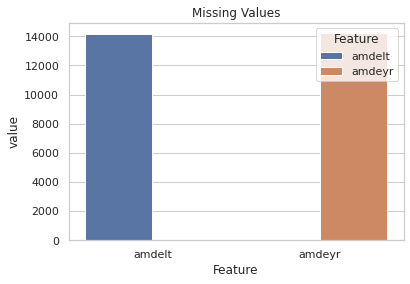

In [ ]:
#plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x = 'Feature',y= 'value',hue='Feature',data=p)
plt.title('Missing Values')

In [ ]:
df1 = df_health[['amdelt','irsex']]
df1['irsex'] = df1['irsex'].map({1: 'Male', 2: 'Female'})

a = df1.isna().groupby(df1['irsex']).sum()
c = df1['irsex'].value_counts()
dicts = {'Sex': [col[:] for col in a.index],'Miss. Value': [row[0] for row in a.values],'Total':c.values}
df_miss = pd.DataFrame(data= dicts,columns=['Sex','Miss. Value','Total'])
df_miss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sex  Miss. Value  Total
0  Female       6897.0  29239
1    Male       7261.0  27037

In [ ]:
df1 = df_health[['amdelt','irsex']]
df1['irsex'] = df1['irsex'].map({1: 'Male', 2: 'Female'})

a = df1.isna().groupby(df1['irsex']).sum()
c = df1['irsex'].value_counts()
dicts = {'Sex': [col[:] for col in a.index],'Miss. Value': [row[0] for row in a.values],'Total MDE':c.values}
df_miss = pd.DataFrame(data= dicts,columns=['Sex','Miss. Value','Total MDE'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


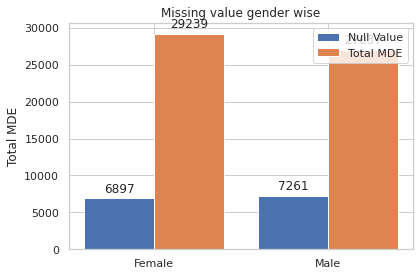

In [ ]:
labels = df_miss['Sex']
df_miss['Miss. Value'] = df_miss['Miss. Value'].astype('int')
men_means = df_miss['Miss. Value']
women_means = df_miss['Total MDE']

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Null Value')
rects2 = ax.bar(x + width/2, women_means, width, label='Total MDE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total MDE')
ax.set_title('Missing value gender wise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
df_health.dropna(inplace=True) # dropping the the rows with missing values in the data frames

In [ ]:
df_health.to_csv('/content/drive/My Drive/MCM Practicum/final_health.csv',index=None) #saving the file into google drive

**Checking and handling for multicollinearity**

for Checking multicollinearity we are using variance inflation factor(VIF) and correlation matrix

1. we are removing the independent variable which are highly correlated correlation coefficients over 0.9.
2. we are removing the independent variable with variance inflation factor greater than 10.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

def find_vif(df):
  """
  this function module return the name of the independent feature having VIF > 10
  """
  X = add_constant(df.drop(columns=['amdelt']))

  vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]
  return X.columns[np.where(np.asarray(vif[1:])>10)]

In [ ]:
def get_correlation(df, thresh):  

  """
  this funtion module return the name of the feature having correlation coefficient 
  greater than thresh which is now currently set to 0.9
  """  
  corrMatrix = df.corr()
  corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

  already_in = set()
  result = []

  for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
    if perfect_corr and col not in already_in:
      already_in.update(set(perfect_corr))
      perfect_corr.append(col)
      result.append(perfect_corr)

  select_nested = [f[1:] for f in result]
  select_flat = [i for j in select_nested for i in j]
  return select_flat

In [ ]:

vif_columns = find_vif(df_health) # finding name of columns having VIF score greater than 10
vif_columns

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Index(['irstmanyrec', 'bnghvymon', 'iltobalcmn', 'illalcmon', 'cigpday',
       'dnicnsp', 'depndalc', 'depndmrj', 'depndcoc', 'depndher', 'depndpyhal',
       'depndpyinh', 'depndpymth', 'depndpypnr', 'depndpystm', 'dppyilanal',
       'abusealc', 'abusemrj', 'abusecoc', 'abuseher', 'abusepyhal',
       'abusepyinh', 'abusepymth', 'abusepypnr', 'abusepystm', 'abpyilanal',
       'abodalc', 'abodmrj', 'abodcoc', 'abodher', 'udpyhal', 'udpyinh',
       'udpymth', 'udpypnr', 'udpystm', 'udpyill'],
      dtype='object')

In [ ]:
correlated_columns = get_correlation(df_health,0.9) # finding the name of the columns having the correlation coefficient greater than 0.9
correlated_columns
#df_health.drop(columns='amdelt')

['iltobalcmn', 'depndher', 'depndpypnr', 'depndpystm', 'adsmmdea']

In [ ]:
#now combining the columns both from VIF score and corelation matrix which is to be removed

columns_tobe_removed = np.concatenate((vif_columns, correlated_columns))
_, i = np.unique(columns_tobe_removed, return_index=True)
columns_tobe_removed

array(['irstmanyrec', 'bnghvymon', 'iltobalcmn', 'illalcmon', 'cigpday',
       'dnicnsp', 'depndalc', 'depndmrj', 'depndcoc', 'depndher',
       'depndpyhal', 'depndpyinh', 'depndpymth', 'depndpypnr',
       'depndpystm', 'dppyilanal', 'abusealc', 'abusemrj', 'abusecoc',
       'abuseher', 'abusepyhal', 'abusepyinh', 'abusepymth', 'abusepypnr',
       'abusepystm', 'abpyilanal', 'abodalc', 'abodmrj', 'abodcoc',
       'abodher', 'udpyhal', 'udpyinh', 'udpymth', 'udpypnr', 'udpystm',
       'udpyill', 'iltobalcmn', 'depndher', 'depndpypnr', 'depndpystm',
       'adsmmdea'], dtype=object)

In [ ]:
# correlation before removing multi collinearity

Text(0.5, 1.0, 'Correlation between the features')

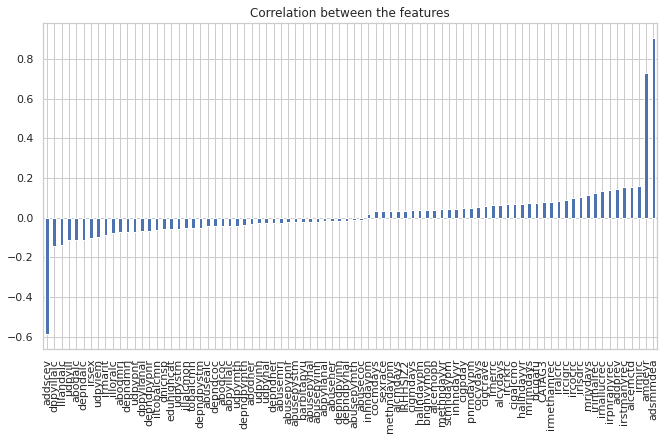

In [ ]:
plt.figure(figsize=(11,6))
df_new = df_health.drop(columns=['amdelt'])
df_new['amdelt'] = df_health['amdelt']
df_new.corr()['amdelt'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation between the features')

In [ ]:
df_health.drop(columns=columns_tobe_removed,axis=1,inplace=True) #removing columns based on VIF score and correlation matrix

In [ ]:
df_health['amdelt'] = df_health['amdelt'].map({1: 1, 2: 0})

In [ ]:
df_health.head()

ircigrc  iralcrc  irmjrc  ircocrc  ...  CATAG3  sexrace  eduhighcat  IRHHSIZ2
0        4        2       9        9  ...       5        1           4         3
1        1        1       1        9  ...       4        3           4         1
2        1        1       3        9  ...       4        7           3         2
3        4        1       9        9  ...       4        5           4         6
4        9        9       9        9  ...       5        2           2         3

[5 rows x 48 columns]

**Checking target variable for class imbalance**

AMDELT is target variable for  MAJOR DEPRESSIVE EPISODE (MDE) in which 1 = Yes and 2 = No

so there are total 42066 cases in which 6860 are those which are having MDE whihc is 16 percent of the data where as 35206 cases are those which are not suffering from MDE which is about 84 percent of the cases.

so this is clearly a cases of class imbalance

To remove the class imbalance we have used combination of under and over sampling techniques using  SMOTETomek and SMOTEENN methods

In [ ]:
# Print the ratio of mde cases
ratio_mde = (df_health['amdelt'].value_counts()/df_health['amdelt'].value_counts().sum()).round(3)
print(f'Ratio of MDE cases: {ratio_mde[1]}\nRatio of non-MDE cases: {ratio_mde[0]}')

Ratio of MDE cases: 0.163
Ratio of non-MDE cases: 0.837


Text(0.5, 1.0, 'Target Variable Frequency')

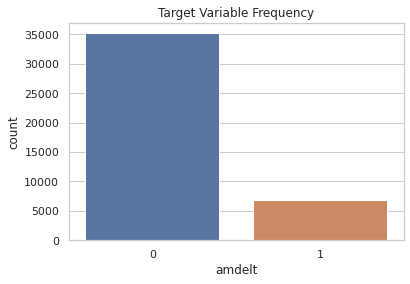

In [ ]:
a,b = df_health['amdelt'].value_counts()
sns.countplot(df_health['amdelt']);
sns.set(style="whitegrid")
plt.title('Target Variable Frequency')

In [ ]:
# Correlation after removing multicollinearity

Text(0.5, 1.0, 'Correlation between the features')

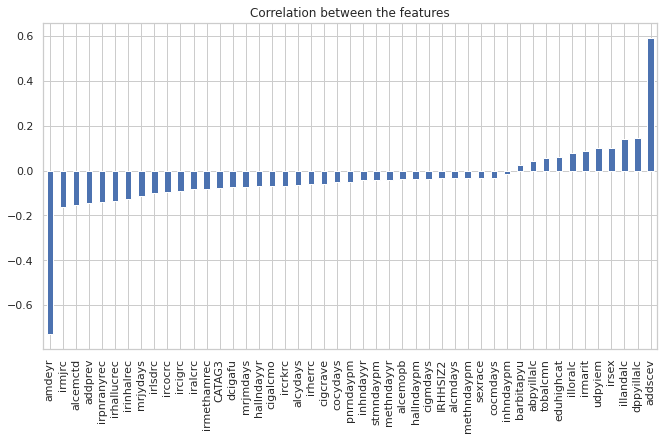

In [ ]:
plt.figure(figsize=(11,6))
df_new = df_health.drop(columns=['amdelt'])
df_new['amdelt'] = df_health['amdelt']
df_new.corr()['amdelt'][:-1].sort_values().plot(kind='bar')
plt.title('Correlation between the features')

In [ ]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42066 entries, 0 to 56275
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ircigrc      42066 non-null  int64  
 1   iralcrc      42066 non-null  int64  
 2   irmjrc       42066 non-null  int64  
 3   ircocrc      42066 non-null  int64  
 4   ircrkrc      42066 non-null  int64  
 5   irherrc      42066 non-null  int64  
 6   irhallucrec  42066 non-null  int64  
 7   irlsdrc      42066 non-null  int64  
 8   irinhalrec   42066 non-null  int64  
 9   irmethamrec  42066 non-null  int64  
 10  irpnranyrec  42066 non-null  int64  
 11  cigalcmo     42066 non-null  int64  
 12  tobalcmn     42066 non-null  int64  
 13  illandalc    42066 non-null  int64  
 14  illoralc     42066 non-null  int64  
 15  barbitapyu   42066 non-null  int64  
 16  dcigafu      42066 non-null  int64  
 17  alcydays     42066 non-null  int64  
 18  mrjydays     42066 non-null  int64  
 19  cocy

In [ ]:
df_health["amdelt"] = df_health['amdelt'].astype('int')
df_health["amdeyr"] = df_health['amdeyr'].astype('int')
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42066 entries, 0 to 56275
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ircigrc      42066 non-null  int64
 1   iralcrc      42066 non-null  int64
 2   irmjrc       42066 non-null  int64
 3   ircocrc      42066 non-null  int64
 4   ircrkrc      42066 non-null  int64
 5   irherrc      42066 non-null  int64
 6   irhallucrec  42066 non-null  int64
 7   irlsdrc      42066 non-null  int64
 8   irinhalrec   42066 non-null  int64
 9   irmethamrec  42066 non-null  int64
 10  irpnranyrec  42066 non-null  int64
 11  cigalcmo     42066 non-null  int64
 12  tobalcmn     42066 non-null  int64
 13  illandalc    42066 non-null  int64
 14  illoralc     42066 non-null  int64
 15  barbitapyu   42066 non-null  int64
 16  dcigafu      42066 non-null  int64
 17  alcydays     42066 non-null  int64
 18  mrjydays     42066 non-null  int64
 19  cocydays     42066 non-null  int64
 20  hallnd

# **Model Development**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import  auc
from imblearn.under_sampling import TomekLinks
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import scipy as scipy
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_health.drop('amdelt',axis=1),df_health['amdelt'], test_size=0.25, random_state=20)

## print info
print("X_train shape:", X_train.shape,"| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train),2), "| y_test mean:", round(np.mean(y_test),2))
print(X_train.shape[1], "features:", X_train.columns.to_list())

X_train shape: (31549, 47) | X_test shape: (10517, 47)
y_train mean: 0.16 | y_test mean: 0.17
47 features: ['ircigrc', 'iralcrc', 'irmjrc', 'ircocrc', 'ircrkrc', 'irherrc', 'irhallucrec', 'irlsdrc', 'irinhalrec', 'irmethamrec', 'irpnranyrec', 'cigalcmo', 'tobalcmn', 'illandalc', 'illoralc', 'barbitapyu', 'dcigafu', 'alcydays', 'mrjydays', 'cocydays', 'hallndayyr', 'inhndayyr', 'methndayyr', 'cigmdays', 'alcmdays', 'mrjmdays', 'cocmdays', 'hallndaypm', 'inhndaypm', 'methndaypm', 'pnrndaypm', 'stmndaypm', 'cigcrave', 'alcemopb', 'alcemctd', 'dppyillalc', 'abpyillalc', 'udpyiem', 'addprev', 'addscev', 'amdeyr', 'irsex', 'irmarit', 'CATAG3', 'sexrace', 'eduhighcat', 'IRHHSIZ2']


In [ ]:
def Hybrid_under_over(X_train,y_train,technique):
  
  if technique == 'SMT':

     #Under and oversamplig using SMOTE + TOMEK
    smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) #TomekLinks with the “sampling_strategy” argument set to only undersample the ‘majority‘ class; for example:
    X_smt, y_smt = smt.fit_sample(X_train,y_train)

  elif technique == 'SME':
    
     #Under and oversamplig using SMOTE + ENN
     smEnn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
     X_smt, y_smt = smEnn.fit_sample(X_train,y_train)

  return X_smt, y_smt

In [ ]:
def evaluate_model(y_test, predicted, predicted_prob, show_thresholds=True, figsize=(25,5)):
    classes = np.unique(y_test)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    
    ## Accuray e AUC
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob)
    print("Accuracy (overall correct predictions):",  round(accuracy,2))
    print("Auc:", round(auc,2))
    
    ## Precision e Recall
    recall = metrics.recall_score(y_test, predicted)  #= true 1s / all 1s in test (got and missed)
    precision = metrics.precision_score(y_test, predicted)  #= true 1s / all 1s predicted (true 1s + false 1s)
    f1 = metrics.f1_score(y_test, predicted)  #=2 * (precision * recall) / (precision + recall)
    print("Recall (all 1s predicted right):", round(recall,2))  #true positive rate, how many 1s I got
    print("Precision (confidence when predicting a 1):", round(precision,2))  #how many 1s were really 1s
    print("F1 score:", round(f1,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in classes]))
       
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
    sns.heatmap(cm, annot=True, annot_kws={"size":15}, fmt='d', ax=ax[0], cmap=plt.cm.Blues, cbar=False)
    ax[0].set(xlabel="Pred", ylabel="True", title="Confusion matrix")
    ax[0].set_yticklabels(labels=classes, rotation=0)
 
    ## Plot roc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)    
    ax[1].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % metrics.auc(fpr, tpr))
    ax[1].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[1].hlines(y=recall, xmin=-0.05, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[1].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
    ax[1].set(xlim=[-0.05,1], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="ROC Curve")     
    ax[1].legend(loc="lower right")
    ax[1].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[1].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), textcoords='offset points', ha='left', va='bottom')
                thres_in_plot.append(t)
            else:
                next
    
    ## Plot precision-recall curve
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob)
    ax[2].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % metrics.auc(recalls, precisions))
    ax[2].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
    ax[2].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[2].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
    ax[2].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[2].legend(loc="lower left")
    ax[2].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[2].annotate(np.round(t,1), xy=(recalls[i],precisions[i]), xytext=(recalls[i],precisions[i]), textcoords='offset points', ha='right', va='bottom')
                thres_in_plot.append(t)
            else:
                next
    plt.show()

In [ ]:
#Data Normalization

from sklearn.preprocessing import MinMaxScaler
def normalize_data(data):
  scaler = MinMaxScaler() 
  data_scaled = scaler.fit_transform(data)
  return data_scaled

In [ ]:
from sklearn.model_selection import GridSearchCV

def hyper_parameter_tunning(estimator,grid_param,X,y,cv,scoring):

  gd_sr = GridSearchCV(estimator=estimator,
                       param_grid=grid_param,
                       cv=cv,
                       scoring=scoring).fit(X, y)

  print("Best Model parameters:", gd_sr.best_params_)
  print("Best Model mean "+scoring+":", round(gd_sr.best_score_, 2))

  model = gd_sr.best_estimator_

  return model

In [ ]:
from sklearn.model_selection import learning_curve

#cv = None, to use the default 5-fold cross validation,
def learning_curves(X, Y, estimator,num_trainings,title):

  train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, Y, cv=None, n_jobs=-1, 
                                                            train_sizes=np.linspace(.1, 1.0,num_trainings
                                                                                    ))

  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)

  plt.figure(figsize=(10,5))
  plt.grid()

  plt.title(title)
  plt.xlabel("Training instances")
  plt.ylabel("Score")

  plt.plot(train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(test_scores_mean, 'o--', color="g", label="Cross-validation score")
  plt.legend(loc="best")
  plt.show()

## **Implementation using SMOTETomek method**

**KNN Basic Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#finding the optimal value of K

k = range(1,40)
error_rate = []

for n_neighbors in k:
    # build the model
    N_KNN1 = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', KNeighborsClassifier(n_neighbors = n_neighbors ))])
    
    scaled_x = normalize_data(X_train)

    N_KNN1.fit(scaled_x,y_train)
    scaled_x_text = normalize_data(X_test)
    predict_new = N_KNN1.predict(scaled_x_text)
    error_rate.append(np.mean(predict_new !=y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Text(0, 0.5, 'Error Rate')

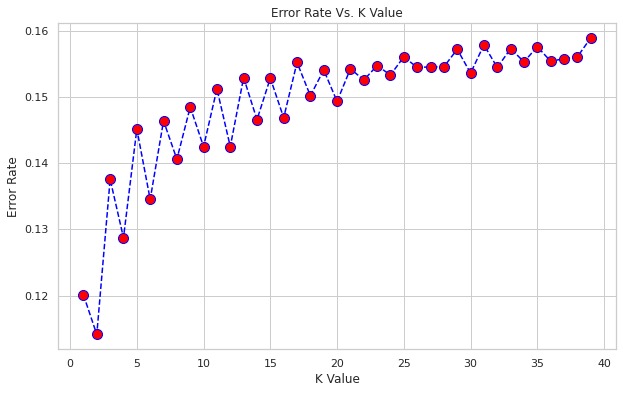

In [ ]:
#Plotting Error Rate Vs K-Value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate Vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=5, random_state=20, shuffle=True)

N_KNN = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', KNeighborsClassifier())])

n_neighbors = [15,18,20]

pipe_grid_KNN = [
             {'smttmk': [SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))],
             'clf':[KNeighborsClassifier()],
             'clf__n_neighbors' : n_neighbors
              }]
              
scaled_x = normalize_data(X_train)

gd_sr_KNN = GridSearchCV(estimator=N_KNN,
                       param_grid=pipe_grid_KNN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.845, total= 2.4min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.843, total= 2.2min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.841, total= 2.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.845, total= 2.3min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.847, total= 2.3min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.850, total= 2.4min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.848, total= 2.4min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.847, total= 2.2min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.849, total= 2.4min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.852, total= 2.2min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.847, total= 2.3min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.845, total= 2.2min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.850, total= 2.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.848, total= 2.5min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.852, total= 2.5min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 34.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#scaled_x_text = scaler.transform(X_test)
scaled_x_text = normalize_data(X_test)
pred_KNN = gd_sr_KNN.predict(scaled_x_text)

predicted_prob_KNN = gd_sr_KNN.predict_proba(scaled_x_text)[:,1]
predicted_prob_KNN

array([0.        , 0.        , 0.27777778, ..., 0.61111111, 0.        ,
       0.        ])

In [ ]:
y_train_KNN = gd_sr_KNN.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_KNN,y_train))
print("Accuracy on test set : ", accuracy_score(pred_KNN,y_test))

Accuracy on training set :  0.8660813337982186
Accuracy on test set :  0.8491014547874869


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_KNN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_KNN.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform'), 'clf__n_neighbors': 18, 'smttmk': SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority'))}
Best Model mean Accuracy: 0.85


Accuracy (overall correct predictions): 0.85
Auc: 0.94
Recall (all 1s predicted right): 0.89
Precision (confidence when predicting a 1): 0.53
F1 score: 0.67
Detail:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8748
           1       0.53      0.89      0.67      1769

    accuracy                           0.85     10517
   macro avg       0.75      0.87      0.78     10517
weighted avg       0.90      0.85      0.86     10517



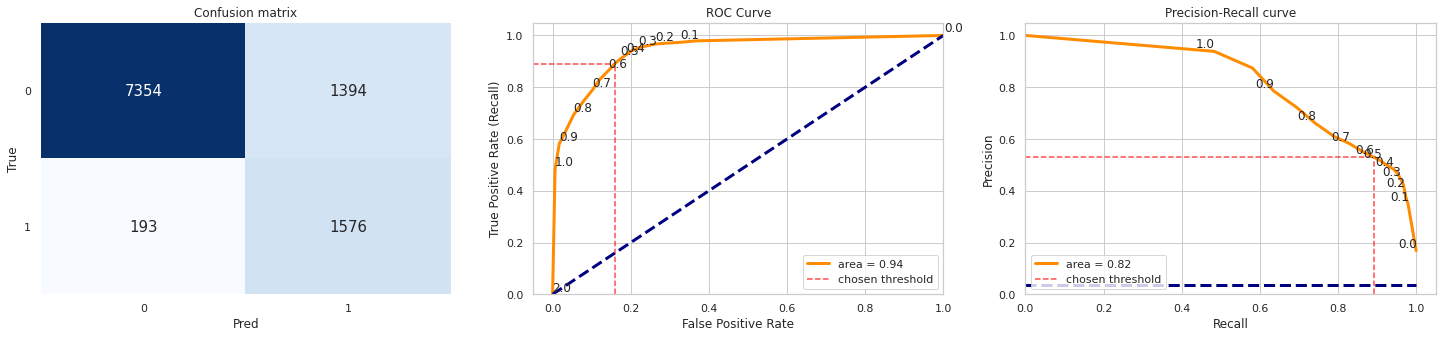

In [ ]:
evaluate_model(y_test, pred_KNN, predicted_prob_KNN, figsize=(25,5))

**Gradient Boosting (GBM) Basic Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

N_GBM = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', GradientBoostingClassifier())])

scaled_x = normalize_data(X_train)

N_GBM.fit(scaled_x,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smttmk',
                 SMOTETomek(random_state=None, ratio=None,
                            sampling_strategy='auto', smote=None,
                            tomek=TomekLinks(n_jobs=1, random_state=None,
                                             ratio=None, return_indices=False,
                                             sampling_strategy='majority'))),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
      

In [ ]:
scaled_x_text = normalize_data(X_test)
pred_GBM = N_GBM.predict(scaled_x_text)

predicted_prob_GBM = N_GBM.predict_proba(scaled_x_text)[:,1]
predicted_prob_GBM

array([0.00801803, 0.00931563, 0.20864528, ..., 0.01127464, 0.01003032,
       0.00642708])

In [ ]:
y_train_GBM = N_GBM.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_GBM,y_train))
print("Accuracy on test set : ", accuracy_score(pred_GBM,y_test))

Accuracy on training set :  0.9245300960410789
Accuracy on test set :  0.9218408291337834


Accuracy (overall correct predictions): 0.92
Auc: 0.96
Recall (all 1s predicted right): 0.65
Precision (confidence when predicting a 1): 0.85
F1 score: 0.74
Detail:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8748
           1       0.85      0.65      0.74      1769

    accuracy                           0.92     10517
   macro avg       0.89      0.81      0.85     10517
weighted avg       0.92      0.92      0.92     10517



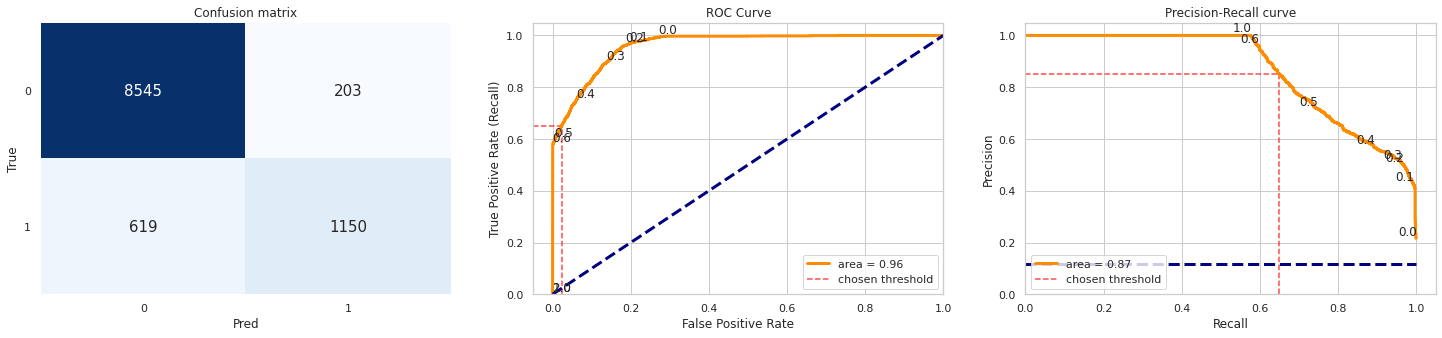

In [ ]:
evaluate_model(y_test, pred_GBM, predicted_prob_GBM, figsize=(25,5))

**Random Forest Basic Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

N_RF = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', RandomForestClassifier())])

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaled_x = scaler.transform(X_train)(

scaled_x = normalize_data(X_train)

N_RF.fit(scaled_x,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smttmk',
                 SMOTETomek(random_state=None, ratio=None,
                            sampling_strategy='auto', smote=None,
                            tomek=TomekLinks(n_jobs=1, random_state=None,
                                             ratio=None, return_indices=False,
                                             sampling_strategy='majority'))),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fra

In [ ]:
#scaled_x_text = scaler.transform(X_test)
scaled_x_text = normalize_data(X_test)
pred_rf = N_RF.predict(scaled_x_text)

predicted_prob_RF = N_RF.predict_proba(scaled_x_text)[:,1]
predicted_prob_RF

array([0.  , 0.  , 0.13, ..., 0.02, 0.  , 0.02])

In [ ]:
y_train_RF = N_RF.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_RF,y_train))
print("Accuracy on test set : ", accuracy_score(pred_rf,y_test))

Accuracy on training set :  0.9967669339757204
Accuracy on test set :  0.9145193496244176


Accuracy (overall correct predictions): 0.91
Auc: 0.95
Recall (all 1s predicted right): 0.65
Precision (confidence when predicting a 1): 0.81
F1 score: 0.72
Detail:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8748
           1       0.81      0.65      0.72      1769

    accuracy                           0.91     10517
   macro avg       0.87      0.81      0.83     10517
weighted avg       0.91      0.91      0.91     10517



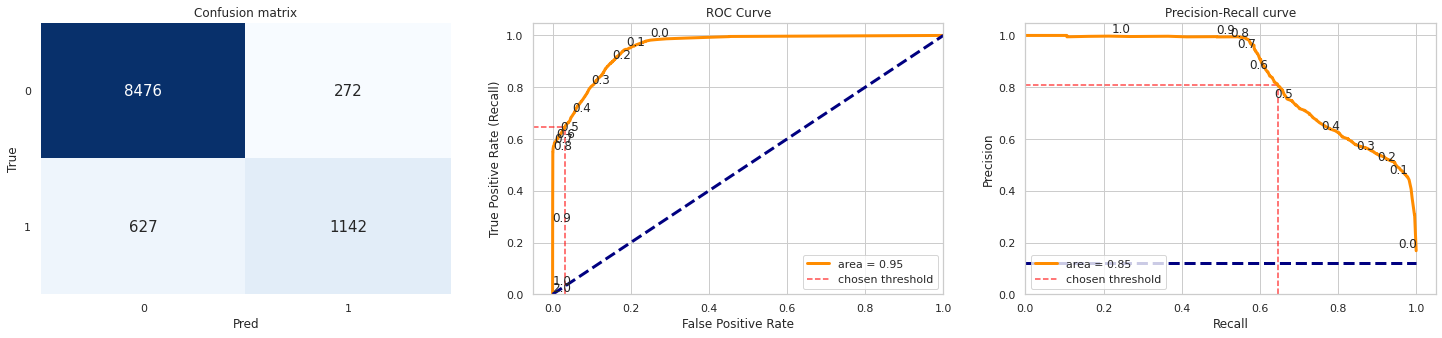

In [ ]:
evaluate_model(y_test, pred_rf, predicted_prob_RF, figsize=(25,5))

**SVM Classifier Basic Model**

In [ ]:
from sklearn.svm import SVC

N_SVC = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', SVC(probability=True))])

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaled_x = scaler.transform(X_train)
scaled_x = normalize_data(X_train)

N_SVC.fit(scaled_x,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smttmk',
                 SMOTETomek(random_state=None, ratio=None,
                            sampling_strategy='auto', smote=None,
                            tomek=TomekLinks(n_jobs=1, random_state=None,
                                             ratio=None, return_indices=False,
                                             sampling_strategy='majority'))),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
#scaled_x_text = scaler.transform(X_test)
scaled_x_text = normalize_data(X_test)
pred_SVC = N_SVC.predict(scaled_x_text)


predicted_prob_SVC = N_SVC.predict_proba(scaled_x_text)[:,1]
predicted_prob_SVC


y_train_SVC = N_SVC.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_SVC,y_train))
print("Accuracy on test set : ", accuracy_score(pred_SVC,y_test))

Accuracy on training set :  0.8647817680433612
Accuracy on test set :  0.8569934391936864


Accuracy (overall correct predictions): 0.86
Auc: 0.94
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.54
F1 score: 0.68
Detail:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8748
           1       0.54      0.92      0.68      1769

    accuracy                           0.86     10517
   macro avg       0.76      0.88      0.80     10517
weighted avg       0.91      0.86      0.87     10517



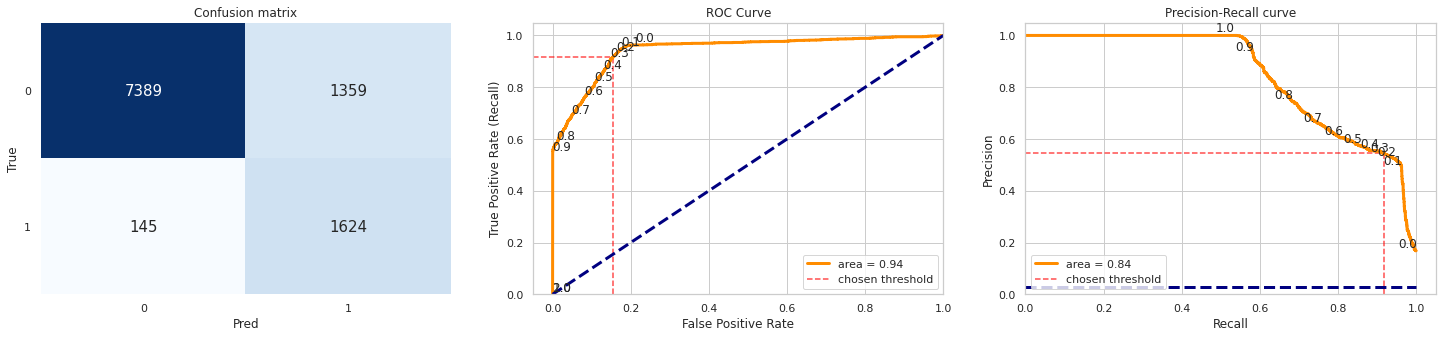

In [ ]:
evaluate_model(y_test, pred_SVC, predicted_prob_SVC, figsize=(25,5))

**Multi Layer Perceptron classifiers**

In [ ]:
from sklearn.neural_network import MLPClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=1)

#activation = ['logistic', 'tanh', 'relu']
learning_rate = ['constant', 'invscaling', 'adaptive']

N_MLP = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', MLPClassifier(hidden_layer_sizes=(46,32,2),max_iter=1100,early_stopping=True))])

pipe_grid_MLP = [
             {'smttmk': [SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))],
             'clf':[MLPClassifier(hidden_layer_sizes=(46,32,2),max_iter=1100,early_stopping=True)],
             #'clf__activation' : activation,
             'clf__learning_rate' : learning_rate}]
              
scaled_x_MLP = normalize_data(X_train)

gd_sr_MLP1 = GridSearchCV(estimator=N_MLP,
                       param_grid=pipe_grid_MLP,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_MLP, y_train)

In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gs_MLP = gd_sr_MLP1.predict(scaled_x_text)

predicted_prob_gs_MLP = gd_sr_MLP1.predict_proba(scaled_x_text)[:,1]
predicted_prob_gs_MLP

print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_MLP1.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_MLP1.best_score_, 2))

In [ ]:
y_train_mlp1 = gd_sr_MLP1.predict(scaled_x_MLP)
print("Accuracy on training set : ", accuracy_score(y_train_mlp1,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gs_MLP,y_test))

In [ ]:
evaluate_model(y_test,pred_gs_MLP,predicted_prob_gs_MLP, figsize=(25,5))

**Hyper Parameter Tunning Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=5, random_state=20, shuffle=True)

n_estimators = [200, 400, 600, 800, 1000]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90]

pipe_RF = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', RandomForestClassifier())])

pipe_grid_RF = [
             {'smttmk': [SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))],
             'clf':[RandomForestClassifier()],
             'clf__n_estimators' : n_estimators,
             'clf__max_depth' : max_depth
 }]

scaled_x_rf = normalize_data(X_train)

gd_sr_RF = GridSearchCV(estimator=pipe_RF,
                       param_grid=pipe_grid_RF,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_rf, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.856, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.857, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.865, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.856, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.863, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.857, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.860, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.857, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.859, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.855, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.862, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.859, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.861, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.861, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.858, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.862, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.859, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.859, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.861, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.913, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.914, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.915, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.912, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.914, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.914, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.914, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 1.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.927, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 1.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 1.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.7min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 1.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.924, total= 1.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.924, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.924, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.0min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.2min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.924, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.924, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.916, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.9min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 3.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 3.1min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 3.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.4min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.3min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.922, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.920, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.7min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.917, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.923, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.5min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.926, total= 2.6min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       cr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.919, total= 2.8min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.921, total= 2.7min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.918, total= 2.7min
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       c

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')), score=0.925, total= 2.8min


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 519.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_RF.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_RF.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'clf__max_depth': 80, 'clf__n_estimators': 600, 'smttmk': SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority'))}
Best Model mean Accuracy: 0.92


In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gs_rf = gd_sr_RF.predict(scaled_x_text)

predicted_prob_gs_rf = gd_sr_RF.predict_proba(scaled_x_text)[:,1]
predicted_prob_gs_rf

array([0.        , 0.00333333, 0.20166667, ..., 0.05333333, 0.        ,
       0.00666667])

Accuracy (overall correct predictions): 0.92
Auc: 0.95
Recall (all 1s predicted right): 0.64
Precision (confidence when predicting a 1): 0.83
F1 score: 0.72
Detail:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8748
           1       0.83      0.64      0.72      1769

    accuracy                           0.92     10517
   macro avg       0.88      0.81      0.84     10517
weighted avg       0.91      0.92      0.91     10517



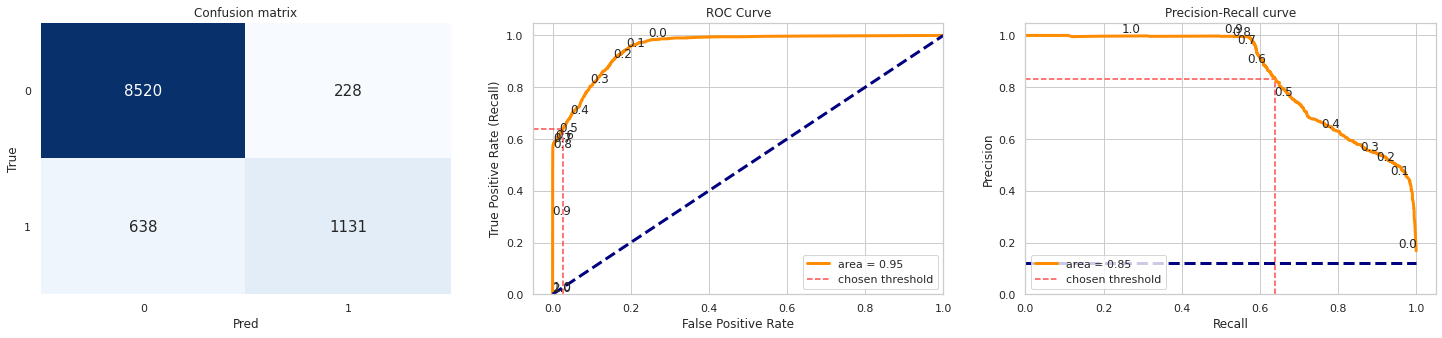

In [ ]:
evaluate_model(y_test,pred_gs_rf,predicted_prob_gs_rf, figsize=(25,5))

**Hyper Parameter Tunning  Gradient Boosting (GBM) Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5, random_state=20, shuffle=True)

n_estimators = [80,120,600,1200,1500]
learning_rate = [0.1,0.05,0.01,0.005]
    
pipe_gbm = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf', GradientBoostingClassifier(min_samples_split=1000,
                                  min_samples_leaf=60,max_depth=8,max_features='sqrt',subsample=0.85))])

pipe_grid_gbm = [
             {'smttmk': [SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))],
             'clf':[GradientBoostingClassifier(min_samples_split=1000,
                                  min_samples_leaf=60,max_depth=8,max_features='sqrt',subsample=0.85)],
             'clf__n_estimators' : n_estimators,
             'clf__learning_rate' : learning_rate          
 }]

#scaler = StandardScaler()
#scaler.fit(X_train)
#scaled_x_svc = scaler.transform(X_train)

scaled_x_gbm = normalize_data(X_train)

gd_sr_gbm = GridSearchCV(estimator=pipe_gbm,
                       param_grid=pipe_grid_gbm,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_gbm, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                      

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampl

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampl

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampl

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampl

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampl

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            samp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sam

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sa

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 248.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gdsr_GBM = gd_sr_gbm.predict(scaled_x_text)

predicted_prob_gdsr_GBM = gd_sr_gbm.predict_proba(scaled_x_text)[:,1]
predicted_prob_gdsr_GBM

y_train_gdsr = gd_sr_gbm.predict(scaled_x_gbm)
print("Accuracy on training set : ", accuracy_score(y_train_gdsr,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gdsr_GBM,y_test))

Accuracy on training set :  0.9406954261624774
Accuracy on test set :  0.9230769230769231


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_gbm.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_gbm.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), 'clf__learning_rate': 0.01, 'clf__n_estimators': 1500, 'smttmk': SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                           

Accuracy (overall correct predictions): 0.92
Auc: 0.96
Recall (all 1s predicted right): 0.62
Precision (confidence when predicting a 1): 0.89
F1 score: 0.73
Detail:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      8748
           1       0.89      0.62      0.73      1769

    accuracy                           0.92     10517
   macro avg       0.91      0.80      0.84     10517
weighted avg       0.92      0.92      0.92     10517



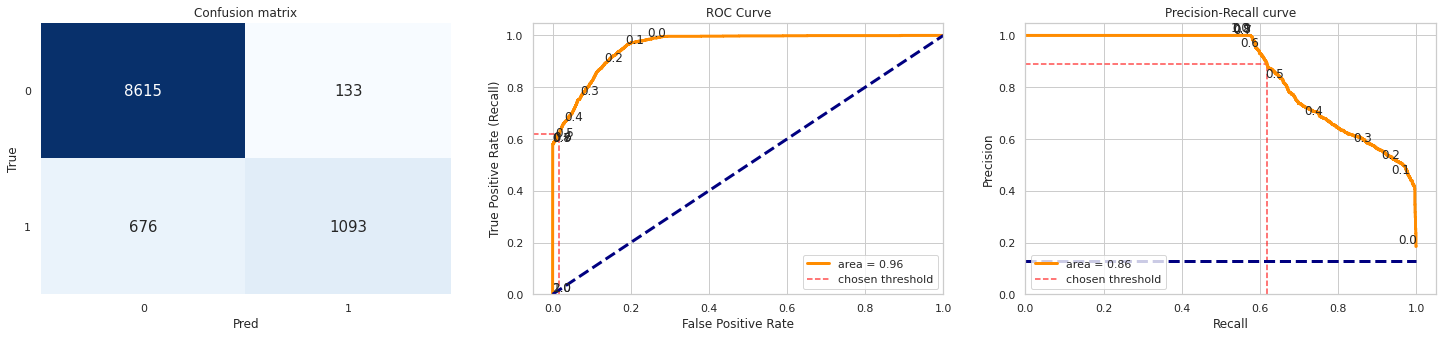

In [ ]:
evaluate_model(y_test, pred_gdsr_GBM,predicted_prob_gdsr_GBM, figsize=(25,5))

**Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

#uo_x_train,uo_y_test =  Hybrid_under_over(X_train=X_train,y_train=y_train,technique='SMT')

#scaled_uo_x_train = normalize_data(uo_x_train)

scaled_x_nn = normalize_data(X_train)
scaled_x_text = normalize_data(X_test)

def create_model():

  model = Sequential()
  model.add(Dense(46,activation='relu'))
  model.add(Dropout(0.2)) #0.2

  model.add(Dense(23,activation='relu'))
  model.add(Dropout(0.5)) #0.5

  model.add(Dense(12,activation='relu'))
  model.add(Dropout(0.5)) #0.5

  #model.add(Dense(6,activation='relu'))
  #model.add(Dropout(0.5))

  model.add(Dense(units=1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer="adam")

  return model

model = KerasClassifier(build_fn=create_model,verbose=1)

kf = KFold(n_splits=5, random_state=20, shuffle=True)

#Dropout = [0.2,0.3,0.4,0.5]
epochs  = [100,120,150]
batch_size =  [32,64,128,256]

pipe_nn = Pipeline([
         ('smttmk', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
         ('clf',model)])

pipe_grid_nn = [
             {'smttmk': [SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))],
             'clf':[model],
             #'clf__Dropout' : Dropout,
             'clf__epochs' : epochs,
             'clf__batch_size' : batch_size          
 }]

gd_sr_nn = GridSearchCV(estimator=pipe_nn,
                       param_grid=pipe_grid_nn,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_nn, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] clf=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3af1c786a0>, clf__batch_size=32, clf__epochs=100, smttmk=SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority')) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.3801
Epoch 2/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2864
Epoch 3/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2728
Epoch 4/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2664
Epoch 5/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2632
Epoch 6/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2612
Epoch 7/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2597
Epoch 8/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2553
Epoch 9/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2581
Epoch 10/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2554
Epoch 11/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2542
Epoch 12/100
1321/1321 [==============================] - 2s 2ms/step - lo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.3889
Epoch 2/100
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2862
Epoch 3/100
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2725
Epoch 4/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2652
Epoch 5/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2622
Epoch 6/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2614
Epoch 7/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2642
Epoch 8/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2588
Epoch 9/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2584
Epoch 10/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2592
Epoch 11/100
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2575
Epoch 12/100
1322/1322 [==============================] - 2s 1ms/step - lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.3min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.3895
Epoch 2/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2846
Epoch 3/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2742
Epoch 4/100
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2708
Epoch 5/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2694
Epoch 6/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2678
Epoch 7/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2644
Epoch 8/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2612
Epoch 9/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2601
Epoch 10/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2611
Epoch 11/100
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2605
Epoch 12/100
1321/1321 [==============================] - 2s 1ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.3952
Epoch 2/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2828
Epoch 3/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2730
Epoch 4/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2681
Epoch 5/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2682
Epoch 6/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2647
Epoch 7/100
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2649
Epoch 8/100
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2614
Epoch 9/100
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2580
Epoch 10/100
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2580
Epoch 11/100
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2596
Epoch 12/100
1323/1323 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1320/1320 [==============================] - 2s 1ms/step - loss: 0.4051
Epoch 2/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2911
Epoch 3/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2779
Epoch 4/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2708
Epoch 5/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2674
Epoch 6/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2645
Epoch 7/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2639
Epoch 8/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2641
Epoch 9/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2613
Epoch 10/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2597
Epoch 11/100
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2613
Epoch 12/100
1320/1320 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.3939
Epoch 2/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2826
Epoch 3/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2723
Epoch 4/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2698
Epoch 5/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2640
Epoch 6/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2639
Epoch 7/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2639
Epoch 8/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2564
Epoch 9/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2580
Epoch 10/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2597
Epoch 11/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2556
Epoch 12/120
1321/1321 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1322/1322 [==============================] - 2s 1ms/step - loss: 0.4336
Epoch 2/120
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2876
Epoch 3/120
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2774
Epoch 4/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2764
Epoch 5/120
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2693
Epoch 6/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2665
Epoch 7/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2639
Epoch 8/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2638
Epoch 9/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2610
Epoch 10/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2592
Epoch 11/120
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2575
Epoch 12/120
1322/1322 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.4045
Epoch 2/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2892
Epoch 3/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2776
Epoch 4/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2748
Epoch 5/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2698
Epoch 6/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2677
Epoch 7/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2650
Epoch 8/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2629
Epoch 9/120
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2624
Epoch 10/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2607
Epoch 11/120
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2593
Epoch 12/120
1321/1321 [==============================] - 2s 1ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.4010
Epoch 2/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2837
Epoch 3/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2723
Epoch 4/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2654
Epoch 5/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2617
Epoch 6/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2628
Epoch 7/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2614
Epoch 8/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2585
Epoch 9/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2588
Epoch 10/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2527
Epoch 11/120
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2570
Epoch 12/120
1323/1323 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.4192
Epoch 2/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2952
Epoch 3/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2791
Epoch 4/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2687
Epoch 5/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2649
Epoch 6/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2622
Epoch 7/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2620
Epoch 8/120
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2582
Epoch 9/120
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2589
Epoch 10/120
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2557
Epoch 11/120
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2556
Epoch 12/120
1320/1320 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.3762
Epoch 2/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2825
Epoch 3/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2691
Epoch 4/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2620
Epoch 5/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2614
Epoch 6/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2583
Epoch 7/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2570
Epoch 8/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2558
Epoch 9/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2550
Epoch 10/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2550
Epoch 11/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2535
Epoch 12/150
1321/1321 [==============================] - 2s 1ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.3825
Epoch 2/150
1322/1322 [==============================] - 2s 1ms/step - loss: 0.2779
Epoch 3/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2710
Epoch 4/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2638
Epoch 5/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2640
Epoch 6/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2569
Epoch 7/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2559
Epoch 8/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2559
Epoch 9/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2533
Epoch 10/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2547
Epoch 11/150
1322/1322 [==============================] - 2s 2ms/step - loss: 0.2501
Epoch 12/150
1322/1322 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.4012
Epoch 2/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2936
Epoch 3/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2791
Epoch 4/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2737
Epoch 5/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2713
Epoch 6/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2685
Epoch 7/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2672
Epoch 8/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2649
Epoch 9/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2679
Epoch 10/150
1321/1321 [==============================] - 2s 1ms/step - loss: 0.2622
Epoch 11/150
1321/1321 [==============================] - 2s 2ms/step - loss: 0.2623
Epoch 12/150
1321/1321 [==============================] - 2s 1ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.4030
Epoch 2/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2850
Epoch 3/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2745
Epoch 4/150
1323/1323 [==============================] - 2s 1ms/step - loss: 0.2708
Epoch 5/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2652
Epoch 6/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2653
Epoch 7/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2645
Epoch 8/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2626
Epoch 9/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2624
Epoch 10/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2613
Epoch 11/150
1323/1323 [==============================] - 2s 2ms/step - loss: 0.2591
Epoch 12/150
1323/1323 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1320/1320 [==============================] - 2s 1ms/step - loss: 0.3970
Epoch 2/150
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2840
Epoch 3/150
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2713
Epoch 4/150
1320/1320 [==============================] - 2s 1ms/step - loss: 0.2680
Epoch 5/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2663
Epoch 6/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2644
Epoch 7/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2654
Epoch 8/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2576
Epoch 9/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2584
Epoch 10/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2582
Epoch 11/150
1320/1320 [==============================] - 2s 2ms/step - loss: 0.2572
Epoch 12/150
1320/1320 [==============================] - 2s 2ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
661/661 [==============================] - 1s 2ms/step - loss: 0.4399
Epoch 2/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2978
Epoch 3/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2794
Epoch 4/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2726
Epoch 5/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2697
Epoch 6/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2664
Epoch 7/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2643
Epoch 8/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2617
Epoch 9/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2552
Epoch 10/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2577
Epoch 11/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2548
Epoch 12/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2544
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
661/661 [==============================] - 1s 2ms/step - loss: 0.4431
Epoch 2/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2901
Epoch 3/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2734
Epoch 4/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2666
Epoch 5/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2638
Epoch 6/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2598
Epoch 7/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2561
Epoch 8/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2571
Epoch 9/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2529
Epoch 10/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2535
Epoch 11/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2518
Epoch 12/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2501
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
661/661 [==============================] - 1s 2ms/step - loss: 0.4245
Epoch 2/100
661/661 [==============================] - 1s 2ms/step - loss: 0.3073
Epoch 3/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2905
Epoch 4/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2770
Epoch 5/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2752
Epoch 6/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2720
Epoch 7/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2691
Epoch 8/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2659
Epoch 9/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2650
Epoch 10/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2657
Epoch 11/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2635
Epoch 12/100
661/661 [==============================] - 1s 2ms/step - loss: 0.2607
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
662/662 [==============================] - 1s 2ms/step - loss: 0.4182
Epoch 2/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2959
Epoch 3/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2814
Epoch 4/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2725
Epoch 5/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2703
Epoch 6/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2668
Epoch 7/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2644
Epoch 8/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2620
Epoch 9/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2626
Epoch 10/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2604
Epoch 11/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2587
Epoch 12/100
662/662 [==============================] - 1s 2ms/step - loss: 0.2581
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
660/660 [==============================] - 1s 2ms/step - loss: 0.4385
Epoch 2/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2988
Epoch 3/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2829
Epoch 4/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2758
Epoch 5/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2729
Epoch 6/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2662
Epoch 7/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2623
Epoch 8/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2626
Epoch 9/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2600
Epoch 10/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2586
Epoch 11/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2557
Epoch 12/100
660/660 [==============================] - 1s 2ms/step - loss: 0.2517
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
661/661 [==============================] - 1s 2ms/step - loss: 0.4347
Epoch 2/120
661/661 [==============================] - 1s 2ms/step - loss: 0.3018
Epoch 3/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2852
Epoch 4/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2780
Epoch 5/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2731
Epoch 6/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2674
Epoch 7/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2668
Epoch 8/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2646
Epoch 9/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2661
Epoch 10/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2616
Epoch 11/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2609
Epoch 12/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2567
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
661/661 [==============================] - 1s 2ms/step - loss: 0.4376
Epoch 2/120
661/661 [==============================] - 1s 2ms/step - loss: 0.3027
Epoch 3/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2869
Epoch 4/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2779
Epoch 5/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2693
Epoch 6/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2649
Epoch 7/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2639
Epoch 8/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2599
Epoch 9/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2567
Epoch 10/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2553
Epoch 11/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2559
Epoch 12/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2549
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
661/661 [==============================] - 1s 2ms/step - loss: 0.4314
Epoch 2/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2960
Epoch 3/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2784
Epoch 4/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2708
Epoch 5/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2690
Epoch 6/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2653
Epoch 7/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2629
Epoch 8/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2648
Epoch 9/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2620
Epoch 10/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2630
Epoch 11/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2592
Epoch 12/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2570
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
662/662 [==============================] - 1s 2ms/step - loss: 0.4196
Epoch 2/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2907
Epoch 3/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2784
Epoch 4/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2697
Epoch 5/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2666
Epoch 6/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2632
Epoch 7/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2599
Epoch 8/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2618
Epoch 9/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2592
Epoch 10/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2560
Epoch 11/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2566
Epoch 12/120
662/662 [==============================] - 1s 2ms/step - loss: 0.2549
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
661/661 [==============================] - 1s 2ms/step - loss: 0.4249
Epoch 2/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2941
Epoch 3/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2815
Epoch 4/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2712
Epoch 5/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2664
Epoch 6/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2642
Epoch 7/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2603
Epoch 8/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2586
Epoch 9/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2568
Epoch 10/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2549
Epoch 11/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2542
Epoch 12/120
661/661 [==============================] - 1s 2ms/step - loss: 0.2543
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
661/661 [==============================] - 1s 2ms/step - loss: 0.3986
Epoch 2/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2883
Epoch 3/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2715
Epoch 4/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2630
Epoch 5/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2620
Epoch 6/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2613
Epoch 7/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2569
Epoch 8/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2578
Epoch 9/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2567
Epoch 10/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2537
Epoch 11/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2507
Epoch 12/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2508
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
661/661 [==============================] - 1s 2ms/step - loss: 0.4286
Epoch 2/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2916
Epoch 3/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2750
Epoch 4/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2686
Epoch 5/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2643
Epoch 6/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2615
Epoch 7/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2596
Epoch 8/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2599
Epoch 9/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2586
Epoch 10/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2572
Epoch 11/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2572
Epoch 12/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2549
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
661/661 [==============================] - 1s 2ms/step - loss: 0.4352
Epoch 2/150
661/661 [==============================] - 1s 2ms/step - loss: 0.3011
Epoch 3/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2811
Epoch 4/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2769
Epoch 5/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2707
Epoch 6/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2691
Epoch 7/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2650
Epoch 8/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2667
Epoch 9/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2641
Epoch 10/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2611
Epoch 11/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2615
Epoch 12/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2614
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
662/662 [==============================] - 1s 2ms/step - loss: 0.4210
Epoch 2/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2964
Epoch 3/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2805
Epoch 4/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2727
Epoch 5/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2684
Epoch 6/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2618
Epoch 7/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2607
Epoch 8/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2591
Epoch 9/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2600
Epoch 10/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2557
Epoch 11/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2565
Epoch 12/150
662/662 [==============================] - 1s 2ms/step - loss: 0.2525
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
661/661 [==============================] - 1s 2ms/step - loss: 0.4094
Epoch 2/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2916
Epoch 3/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2808
Epoch 4/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2731
Epoch 5/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2699
Epoch 6/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2662
Epoch 7/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2634
Epoch 8/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2605
Epoch 9/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2619
Epoch 10/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2592
Epoch 11/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2592
Epoch 12/150
661/661 [==============================] - 1s 2ms/step - loss: 0.2565
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
331/331 [==============================] - 1s 2ms/step - loss: 0.4765
Epoch 2/100
331/331 [==============================] - 1s 2ms/step - loss: 0.3072
Epoch 3/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2866
Epoch 4/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2766
Epoch 5/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2683
Epoch 6/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2681
Epoch 7/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2624
Epoch 8/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2622
Epoch 9/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2602
Epoch 10/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2591
Epoch 11/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2575
Epoch 12/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2557
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
331/331 [==============================] - 1s 2ms/step - loss: 0.4867
Epoch 2/100
331/331 [==============================] - 1s 2ms/step - loss: 0.3122
Epoch 3/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2877
Epoch 4/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2770
Epoch 5/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2693
Epoch 6/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2672
Epoch 7/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2645
Epoch 8/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2611
Epoch 9/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2602
Epoch 10/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2571
Epoch 11/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2577
Epoch 12/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2534
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
331/331 [==============================] - 1s 2ms/step - loss: 0.4579
Epoch 2/100
331/331 [==============================] - 1s 2ms/step - loss: 0.3130
Epoch 3/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2916
Epoch 4/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2785
Epoch 5/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2745
Epoch 6/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2725
Epoch 7/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2706
Epoch 8/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2681
Epoch 9/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2666
Epoch 10/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2661
Epoch 11/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2640
Epoch 12/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2645
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
331/331 [==============================] - 1s 2ms/step - loss: 0.5075
Epoch 2/100
331/331 [==============================] - 1s 2ms/step - loss: 0.3294
Epoch 3/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2997
Epoch 4/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2909
Epoch 5/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2818
Epoch 6/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2811
Epoch 7/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2776
Epoch 8/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2775
Epoch 9/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2738
Epoch 10/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2738
Epoch 11/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2742
Epoch 12/100
331/331 [==============================] - 1s 2ms/step - loss: 0.2697
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
330/330 [==============================] - 1s 2ms/step - loss: 0.5107
Epoch 2/100
330/330 [==============================] - 1s 2ms/step - loss: 0.3070
Epoch 3/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2787
Epoch 4/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2684
Epoch 5/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2633
Epoch 6/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2594
Epoch 7/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2572
Epoch 8/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2545
Epoch 9/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2557
Epoch 10/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2532
Epoch 11/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2529
Epoch 12/100
330/330 [==============================] - 1s 2ms/step - loss: 0.2512
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
331/331 [==============================] - 1s 2ms/step - loss: 0.5449
Epoch 2/120
331/331 [==============================] - 1s 2ms/step - loss: 0.3342
Epoch 3/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2938
Epoch 4/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2846
Epoch 5/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2776
Epoch 6/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2719
Epoch 7/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2671
Epoch 8/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2675
Epoch 9/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2662
Epoch 10/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2628
Epoch 11/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2607
Epoch 12/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2578
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
331/331 [==============================] - 1s 2ms/step - loss: 0.4882
Epoch 2/120
331/331 [==============================] - 1s 2ms/step - loss: 0.3104
Epoch 3/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2799
Epoch 4/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2690
Epoch 5/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2645
Epoch 6/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2602
Epoch 7/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2579
Epoch 8/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2574
Epoch 9/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2530
Epoch 10/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2517
Epoch 11/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2525
Epoch 12/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2503
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
331/331 [==============================] - 1s 2ms/step - loss: 0.5111
Epoch 2/120
331/331 [==============================] - 1s 2ms/step - loss: 0.3165
Epoch 3/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2908
Epoch 4/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2782
Epoch 5/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2723
Epoch 6/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2689
Epoch 7/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2670
Epoch 8/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2645
Epoch 9/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2625
Epoch 10/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2605
Epoch 11/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2580
Epoch 12/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2576
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
331/331 [==============================] - 1s 2ms/step - loss: 0.4977
Epoch 2/120
331/331 [==============================] - 1s 2ms/step - loss: 0.3236
Epoch 3/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2976
Epoch 4/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2888
Epoch 5/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2841
Epoch 6/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2782
Epoch 7/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2728
Epoch 8/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2714
Epoch 9/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2683
Epoch 10/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2701
Epoch 11/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2660
Epoch 12/120
331/331 [==============================] - 1s 2ms/step - loss: 0.2636
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
330/330 [==============================] - 1s 2ms/step - loss: 0.5108
Epoch 2/120
330/330 [==============================] - 1s 2ms/step - loss: 0.3248
Epoch 3/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2949
Epoch 4/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2801
Epoch 5/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2747
Epoch 6/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2686
Epoch 7/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2642
Epoch 8/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2612
Epoch 9/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2602
Epoch 10/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2594
Epoch 11/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2550
Epoch 12/120
330/330 [==============================] - 1s 2ms/step - loss: 0.2565
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
331/331 [==============================] - 1s 2ms/step - loss: 0.5089
Epoch 2/150
331/331 [==============================] - 1s 2ms/step - loss: 0.3160
Epoch 3/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2880
Epoch 4/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2822
Epoch 5/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2754
Epoch 6/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2702
Epoch 7/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2689
Epoch 8/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2660
Epoch 9/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2602
Epoch 10/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2597
Epoch 11/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2614
Epoch 12/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2575
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
331/331 [==============================] - 1s 2ms/step - loss: 0.4999
Epoch 2/150
331/331 [==============================] - 1s 2ms/step - loss: 0.3283
Epoch 3/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2871
Epoch 4/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2771
Epoch 5/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2676
Epoch 6/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2677
Epoch 7/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2635
Epoch 8/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2616
Epoch 9/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2590
Epoch 10/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2581
Epoch 11/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2572
Epoch 12/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2544
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
331/331 [==============================] - 1s 2ms/step - loss: 0.4987
Epoch 2/150
331/331 [==============================] - 1s 2ms/step - loss: 0.3247
Epoch 3/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2993
Epoch 4/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2888
Epoch 5/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2803
Epoch 6/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2754
Epoch 7/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2699
Epoch 8/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2677
Epoch 9/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2651
Epoch 10/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2651
Epoch 11/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2622
Epoch 12/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2580
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
331/331 [==============================] - 1s 2ms/step - loss: 0.4818
Epoch 2/150
331/331 [==============================] - 1s 2ms/step - loss: 0.3137
Epoch 3/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2948
Epoch 4/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2843
Epoch 5/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2837
Epoch 6/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2779
Epoch 7/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2746
Epoch 8/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2707
Epoch 9/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2681
Epoch 10/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2671
Epoch 11/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2628
Epoch 12/150
331/331 [==============================] - 1s 2ms/step - loss: 0.2627
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
330/330 [==============================] - 1s 2ms/step - loss: 0.4632
Epoch 2/150
330/330 [==============================] - 1s 2ms/step - loss: 0.3059
Epoch 3/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2800
Epoch 4/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2714
Epoch 5/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2635
Epoch 6/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2623
Epoch 7/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2605
Epoch 8/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2596
Epoch 9/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2571
Epoch 10/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2568
Epoch 11/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2560
Epoch 12/150
330/330 [==============================] - 1s 2ms/step - loss: 0.2535
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5514
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3005
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2847
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2633
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 11/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 12/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2575
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5411
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3031
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2784
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2694
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 11/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 12/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2588
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5817
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2969
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2784
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 11/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 12/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5689
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.3008
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2794
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 11/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 12/100
166/166 [==============================] - 0s 2ms/step - loss: 0.2590
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6095
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3706
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3107
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2739
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2740
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2646
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2629
Epoch 11/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2620
Epoch 12/100
165/165 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
166/166 [==============================] - 0s 2ms/step - loss: 0.5523
Epoch 2/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 3/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3067
Epoch 4/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 5/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 6/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2739
Epoch 7/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 8/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 9/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2614
Epoch 10/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2601
Epoch 11/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 12/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
166/166 [==============================] - 0s 2ms/step - loss: 0.5194
Epoch 2/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 3/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 4/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2942
Epoch 5/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 6/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 7/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 8/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 9/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 10/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 11/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 12/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2634
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
166/166 [==============================] - 0s 2ms/step - loss: 0.6249
Epoch 2/120
166/166 [==============================] - 0s 2ms/step - loss: 0.4042
Epoch 3/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3306
Epoch 4/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 5/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2923
Epoch 6/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2868
Epoch 7/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 8/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2810
Epoch 9/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 10/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 11/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 12/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
166/166 [==============================] - 0s 3ms/step - loss: 0.5462
Epoch 2/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3533
Epoch 3/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 4/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3020
Epoch 5/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2925
Epoch 6/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2890
Epoch 7/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2820
Epoch 8/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 9/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 10/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2773
Epoch 11/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2763
Epoch 12/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
166/166 [==============================] - 0s 2ms/step - loss: 0.5891
Epoch 2/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 3/120
166/166 [==============================] - 0s 2ms/step - loss: 0.3171
Epoch 4/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 5/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 6/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2752
Epoch 7/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 8/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 9/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 10/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2636
Epoch 11/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 12/120
166/166 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
166/166 [==============================] - 0s 2ms/step - loss: 0.6128
Epoch 2/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3970
Epoch 3/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 4/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 5/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 6/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 7/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 8/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2716
Epoch 9/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 10/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 11/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 12/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2635
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
166/166 [==============================] - 0s 2ms/step - loss: 0.6106
Epoch 2/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 3/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 4/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 5/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 6/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2738
Epoch 7/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2680
Epoch 8/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 9/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2606
Epoch 10/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 11/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 12/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5503
Epoch 2/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 3/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 4/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2913
Epoch 5/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 6/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 7/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2720
Epoch 8/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2697
Epoch 9/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 10/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 11/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2645
Epoch 12/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
166/166 [==============================] - 0s 2ms/step - loss: 0.5919
Epoch 2/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3588
Epoch 3/150
166/166 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 4/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 5/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2871
Epoch 6/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 7/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2729
Epoch 8/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 9/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 10/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2663
Epoch 11/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2650
Epoch 12/150
166/166 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
165/165 [==============================] - 0s 2ms/step - loss: 0.5647
Epoch 2/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3613
Epoch 3/150
165/165 [==============================] - 0s 2ms/step - loss: 0.3068
Epoch 4/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2823
Epoch 5/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2726
Epoch 6/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 7/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2661
Epoch 8/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 9/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 10/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 11/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 12/150
165/165 [==============================] - 0s 2ms/step - loss: 0.2540
Epoch 13/150


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 246.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
207/207 [==============================] - 0s 2ms/step - loss: 0.5610
Epoch 2/150
207/207 [==============================] - 0s 2ms/step - loss: 0.3278
Epoch 3/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 4/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 5/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 6/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2712
Epoch 7/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2698
Epoch 8/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2667
Epoch 9/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 10/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 11/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 12/150
207/207 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 13/150


In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
#,callbacks=[early_stop]

In [ ]:
#model.fit(x=scaled_uo_x_train,y=uo_y_test,epochs=110,batch_size=128,validation_data=(scaled_x_text,y_test ))

In [ ]:
#losses = pd.DataFrame(model.history.history)

In [ ]:
#losses.plot()
#plt.title('Loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')

In [ ]:
#predictions = model.predict_classes(scaled_x_text)

In [ ]:
#predicted_prob_nn = model.predict_proba(scaled_x_text)
#predicted_prob_nn

In [ ]:
pred_gdsr_nn = gd_sr_nn.predict(scaled_x_text)

predicted_prob_gdsr_nn = gd_sr_nn.predict_proba(scaled_x_text)[:,1]
predicted_prob_gdsr_nn

y_train_gdsr = gd_sr_nn.predict(scaled_x_nn)
print("Accuracy on training set : ", accuracy_score(y_train_gdsr,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gdsr_nn,y_test))

42/42 [==============================] - 0s 1ms/step
Instructions for updating:
Please use `model.predict()` instead.
124/124 [==============================] - 0s 938us/step
Accuracy on training set :  0.8866525087958413
Accuracy on test set :  0.8707806408671674


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_nn.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_nn.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3af1c786a0>, 'clf__batch_size': 256, 'clf__epochs': 150, 'smttmk': SMOTETomek(random_state=None, ratio=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=1, random_state=None, ratio=None,
                            return_indices=False,
                            sampling_strategy='majority'))}
Best Model mean Accuracy: 0.87


Accuracy (overall correct predictions): 0.87
Auc: 0.94
Recall (all 1s predicted right): 0.86
Precision (confidence when predicting a 1): 0.58
F1 score: 0.69
Detail:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8748
           1       0.58      0.86      0.69      1769

    accuracy                           0.87     10517
   macro avg       0.77      0.87      0.80     10517
weighted avg       0.90      0.87      0.88     10517



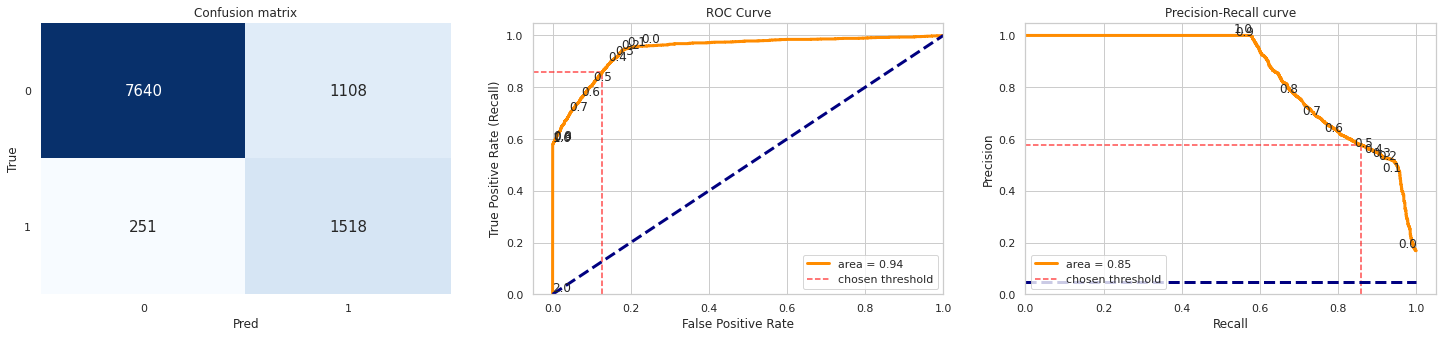

In [ ]:
evaluate_model(y_test,pred_gdsr_nn,predicted_prob_gdsr_nn, figsize=(25,5))

## **Implementation using SMOTEENN method**

## **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=5, random_state=20, shuffle=True)

N_KNN_ENN = Pipeline([
         ('smtenn', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf', KNeighborsClassifier())])

n_neighbors = [15,18,20]

pipe_grid_KNN_ENN = [
             {'smtenn': [SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))],
             'clf':[KNeighborsClassifier()],
             'clf__n_neighbors' : n_neighbors
              }]
              
scaled_x = normalize_data(X_train)

gd_sr_KNN_ENN = GridSearchCV(estimator=N_KNN_ENN,
                       param_grid=pipe_grid_KNN_ENN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.824, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.824, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.826, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=15, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.830, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.2min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.826, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=18, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.834, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.828, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.826, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.830, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total= 1.1min
[CV] clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), clf__n_neighbors=20, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.834, total= 1.1min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 16.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaled_x_text = normalize_data(X_test)
pred_KNN_ENN = gd_sr_KNN_ENN.predict(scaled_x_text)

In [ ]:
pred_prob_KNN_ENN = gd_sr_KNN_ENN.predict_proba(scaled_x_text)[:,1]

y_train_KNN = gd_sr_KNN_ENN.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_KNN,y_train))
print("Accuracy on test set : ", accuracy_score(pred_KNN_ENN,y_test))

Accuracy on training set :  0.8362864116136803
Accuracy on test set :  0.8338879908719217


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_KNN_ENN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_KNN_ENN.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform'), 'clf__n_neighbors': 20, 'smtenn': SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None)}
Best Model mean Accuracy: 0.83


Accuracy (overall correct predictions): 0.83
Auc: 0.93
Recall (all 1s predicted right): 0.95
Precision (confidence when predicting a 1): 0.5
F1 score: 0.66
Detail:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8748
           1       0.50      0.95      0.66      1769

    accuracy                           0.83     10517
   macro avg       0.75      0.88      0.77     10517
weighted avg       0.91      0.83      0.85     10517



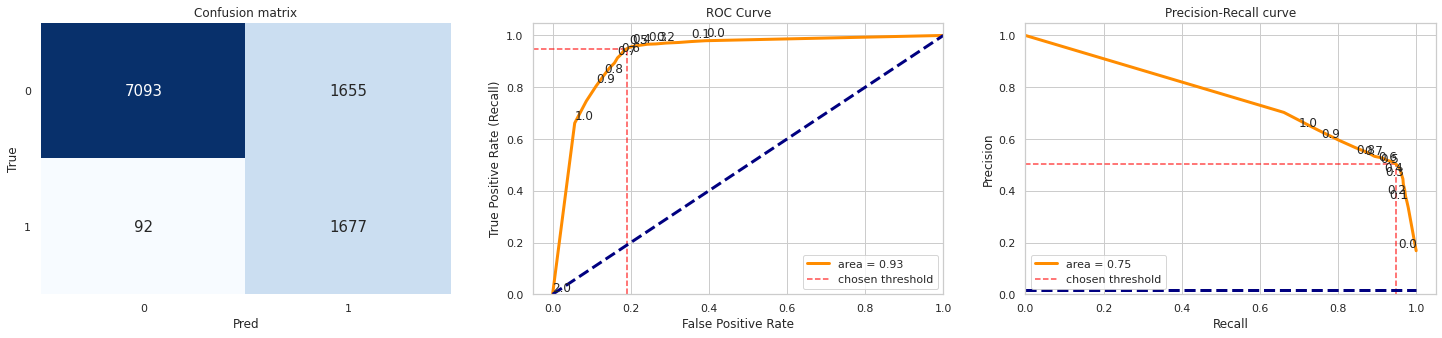

In [ ]:
evaluate_model(y_test, pred_KNN_ENN, pred_prob_KNN_ENN, figsize=(25,5))

## **SVM**

In [ ]:
from sklearn.svm import SVC

N_SVC_ENN = Pipeline([
         ('smtENN', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf', SVC(probability=True))])

scaled_x = normalize_data(X_train)

N_SVC_ENN.fit(scaled_x,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smtENN',
                 SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1,
                                                      n_neighbors=3,
                                                      random_state=None,
                                                      ratio=None,
                                                      return_indices=False,
                                                      sampling_strategy='majority'),
                          random_state=None, ratio=None,
                          sampling_strategy='auto', smote=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbo

In [ ]:
scaled_x_text = normalize_data(X_test)
pred_SVC_ENN = N_SVC_ENN.predict(scaled_x_text)

pred_prob_SVC_ENN = N_SVC_ENN.predict_proba(scaled_x_text)[:,1]
pred_prob_SVC_ENN

y_train_SVC_ENN = N_SVC_ENN.predict(scaled_x)
print("Accuracy on training set : ", accuracy_score(y_train_SVC_ENN,y_train))
print("Accuracy on test set : ", accuracy_score(pred_SVC_ENN,y_test))

Accuracy on training set :  0.8289010745190022
Accuracy on test set :  0.8318912237330037


Accuracy (overall correct predictions): 0.83
Auc: 0.94
Recall (all 1s predicted right): 0.97
Precision (confidence when predicting a 1): 0.5
F1 score: 0.66
Detail:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      8748
           1       0.50      0.97      0.66      1769

    accuracy                           0.83     10517
   macro avg       0.75      0.89      0.77     10517
weighted avg       0.91      0.83      0.85     10517



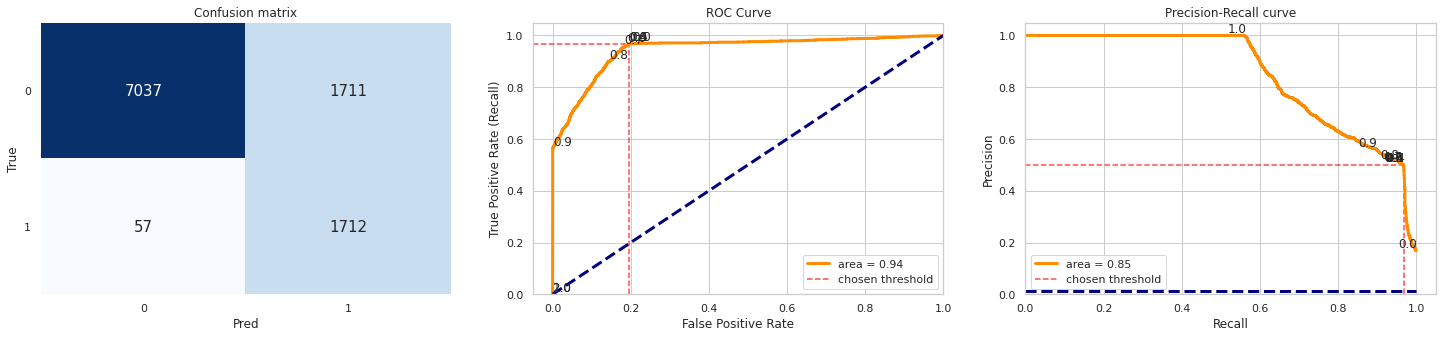

In [ ]:
evaluate_model(y_test, pred_SVC_ENN, pred_prob_SVC_ENN, figsize=(25,5))

# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

kf = KFold(n_splits=5, random_state=20, shuffle=True)

n_estimators = [80,120,600,1200,1500]
learning_rate = [0.1,0.05,0.01,0.005]
    
pipe_gbm_ENN = Pipeline([
         ('smtenn', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf', GradientBoostingClassifier(min_samples_split=1000,
                                  min_samples_leaf=60,max_depth=8,max_features='sqrt',subsample=0.85))])

pipe_grid_gbm_ENN = [
             {'smtenn': [SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))],
             'clf':[GradientBoostingClassifier(min_samples_split=1000,
                                  min_samples_leaf=60,max_depth=8,max_features='sqrt',subsample=0.85)],
             'clf__n_estimators' : n_estimators,
             'clf__learning_rate' : learning_rate          
 }]

scaled_x_gbm = normalize_data(X_train)

gd_sr_gbm_ENN = GridSearchCV(estimator=pipe_gbm_ENN,
                       param_grid=pipe_grid_gbm_ENN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_gbm, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                         

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                           

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.2s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                           

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                           

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                           

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                           

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.1, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.05, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                          

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.01, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=80, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                         

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=120, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=600, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                        

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1200, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), clf__learning_rate=0.005, clf__n_estimators=1500, smtenn=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                       

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 132.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gdsr_GBM_ENN = gd_sr_gbm_ENN.predict(scaled_x_text)

pred_prob_gdsr_GBM_ENN = gd_sr_gbm_ENN.predict_proba(scaled_x_text)[:,1]
pred_prob_gdsr_GBM_ENN


array([0.00094337, 0.00039373, 0.02158375, ..., 0.00073054, 0.00010905,
       0.00018316])

In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_gbm_ENN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_gbm_ENN.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), 'clf__learning_rate': 0.1, 'clf__n_estimators': 600, 'smtenn': SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                  

In [ ]:
scaled_x_text = normalize_data(X_test)
y_pred_gdsr_GBM_ENN = gd_sr_gbm_ENN.predict(scaled_x_text)

predicted_prob_gdsr_GBM = gd_sr_gbm_ENN.predict_proba(scaled_x_text)[:,1]
predicted_prob_gdsr_GBM

y_train_gdsr = gd_sr_gbm_ENN.predict(scaled_x_gbm)
print("Accuracy on training set : ", accuracy_score(y_train_gdsr,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gdsr_GBM_ENN,y_test))

Accuracy on training set :  0.9045611588322926
Accuracy on test set :  0.8717314823618902


Accuracy (overall correct predictions): 0.87
Auc: 0.96
Recall (all 1s predicted right): 0.87
Precision (confidence when predicting a 1): 0.58
F1 score: 0.69
Detail:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8748
           1       0.58      0.87      0.69      1769

    accuracy                           0.87     10517
   macro avg       0.77      0.87      0.81     10517
weighted avg       0.90      0.87      0.88     10517



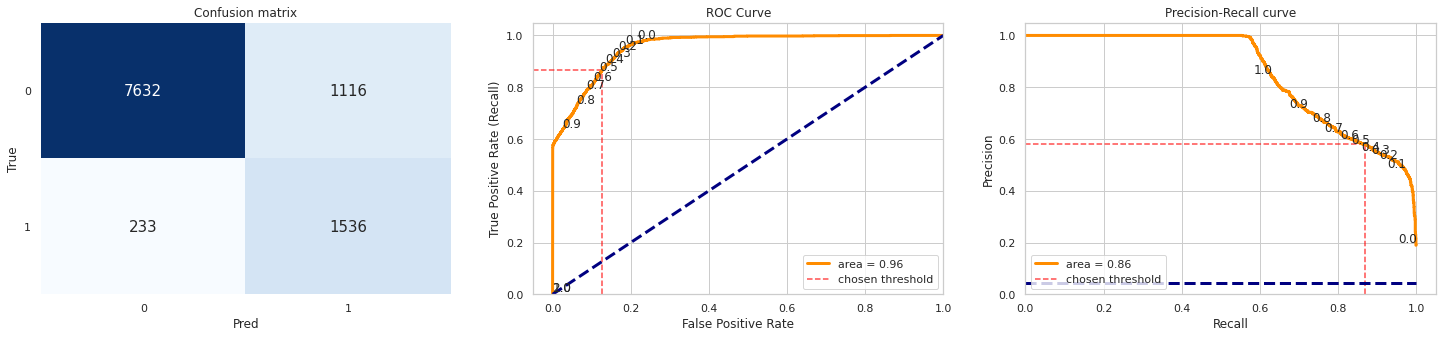

In [ ]:
evaluate_model(y_test, pred_gdsr_GBM_ENN,pred_prob_gdsr_GBM_ENN, figsize=(25,5))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, random_state=20, shuffle=True)

n_estimators = [200, 400, 600, 800, 1000]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90]

pipe_RF_ENN = Pipeline([
         ('smttmk', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf', RandomForestClassifier())])

pipe_grid_RF_ENN = [
             {'smttmk': [SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))],
             'clf':[RandomForestClassifier()],
             'clf__n_estimators' : n_estimators,
             'clf__max_depth' : max_depth
 }]

scaled_x_rf = normalize_data(X_train)

gd_sr_RF_ENN = GridSearchCV(estimator=pipe_RF_ENN,
                       param_grid=pipe_grid_RF_ENN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_rf, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.832, total=  51.0s
[CV] clf=Rando

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total=  56.5s
[CV] clf=Rando

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total=  54.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total=  51.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.834, total=  52.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.832, total=  54.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total=  56.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total=  58.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total=  56.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.834, total=  56.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.832, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.832, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total=  59.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.832, total= 1.1min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.827, total= 1.1min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.829, total= 1.0min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total= 1.1min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=10, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.833, total= 1.1min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  49.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  47.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  47.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  46.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  49.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  55.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  56.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  55.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  56.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  55.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.847, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.847, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.847, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.847, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.847, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=20, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  51.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  49.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total=  49.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  50.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  49.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  54.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  53.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  52.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  55.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  55.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total=  57.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  58.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  59.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.854, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=30, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  48.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  47.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  47.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  47.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  47.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  53.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  53.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  54.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  53.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  49.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  58.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  58.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  59.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  58.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  58.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=40, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  45.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  46.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  48.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  47.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  47.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  53.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  52.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  53.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  53.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  50.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  58.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  58.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=50, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total=  47.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  47.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  44.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  49.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  47.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  54.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  55.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  57.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  57.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  56.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  59.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.4min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=60, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total=  53.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  51.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  48.4s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  51.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  51.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  57.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  58.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  56.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=70, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  51.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  49.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  51.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  50.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  53.2s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  58.6s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total=  57.0s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total=  58.5s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=80, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.853, total=  54.7s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total=  54.8s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  54.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  52.9s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=200, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total=  53.1s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total=  57.3s
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=400, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.0min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=600, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.1min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.848, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=800, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.2min
[CV] clf=Rando

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.851, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.852, total= 1.3min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.849, total= 1.2min
[CV] clf=Rand

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[CV]  clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), clf__max_depth=90, clf__n_estimators=1000, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None), score=0.850, total= 1.4min


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 233.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_RF_ENN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_RF_ENN.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'clf__max_depth': 90, 'clf__n_estimators': 200, 'smttmk': SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote

In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gdsr_rf_ENN = gd_sr_RF_ENN.predict(scaled_x_text)

pred_prob_gdsr_rf_ENN = gd_sr_RF_ENN.predict_proba(scaled_x_text)[:,1]
pred_prob_gdsr_rf_ENN


y_train_gdsr_rf_ENN = gd_sr_RF_ENN.predict(scaled_x_text)

Accuracy (overall correct predictions): 0.85
Auc: 0.95
Recall (all 1s predicted right): 0.92
Precision (confidence when predicting a 1): 0.54
F1 score: 0.68
Detail:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8748
           1       0.54      0.92      0.68      1769

    accuracy                           0.85     10517
   macro avg       0.76      0.88      0.79     10517
weighted avg       0.91      0.85      0.87     10517



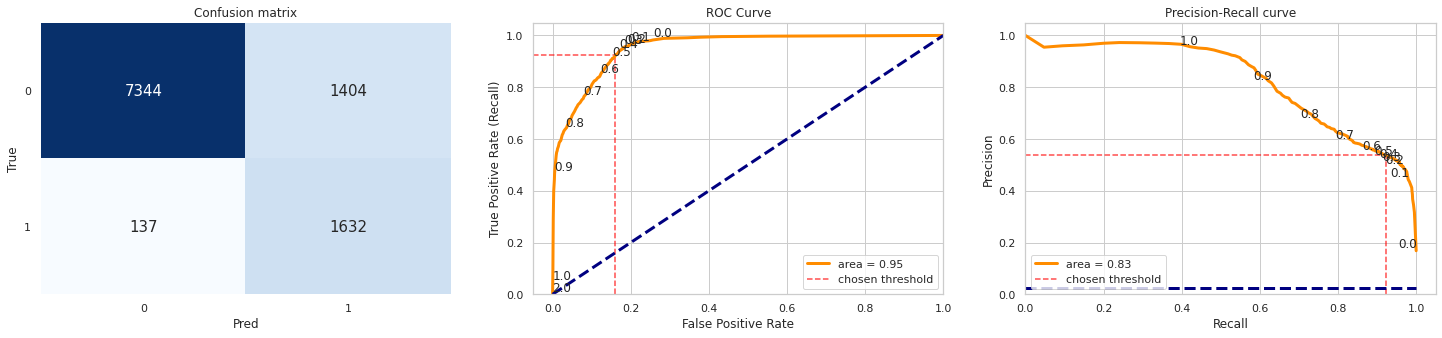

In [ ]:
evaluate_model(y_test, pred_gdsr_rf_ENN, pred_prob_gdsr_rf_ENN, figsize=(25,5))

## **Neural Network**



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

scaled_x_nn = normalize_data(X_train)
scaled_x_text = normalize_data(X_test)

def create_model():

  model_ENN = Sequential()
  model_ENN.add(Dense(46,activation='relu'))
  model_ENN.add(Dropout(0.2)) #0.2

  model_ENN.add(Dense(23,activation='relu'))
  model_ENN.add(Dropout(0.5)) #0.5

  model_ENN.add(Dense(12,activation='relu'))
  model_ENN.add(Dropout(0.5)) #0.5

  model_ENN.add(Dense(units=1,activation='sigmoid'))

  model_ENN.compile(loss='binary_crossentropy',optimizer="adam")

  return model_ENN

model_ENN = KerasClassifier(build_fn=create_model,verbose=1)

kf = KFold(n_splits=5, random_state=20, shuffle=True)

epochs  = [100,120,150]
batch_size =  [32,64,128,256]

pipe_nn_ENN = Pipeline([
         ('smttmk', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf',model_ENN)])

pipe_grid_ENN = [
             {'smttmk': [SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))],
             'clf':[model_ENN],
             #'clf__Dropout' : Dropout,
             'clf__epochs' : epochs,
             'clf__batch_size' : batch_size          
 }]

gd_sr_nn_ENN = GridSearchCV(estimator=pipe_nn_ENN,
                       param_grid=pipe_grid_ENN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_nn, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] clf=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff85ad87978>, clf__batch_size=32, clf__epochs=100, smttmk=SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1206/1206 [==============================] - 4s 3ms/step - loss: 0.3151
Epoch 2/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.2024
Epoch 3/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1934
Epoch 4/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1857
Epoch 5/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1799
Epoch 6/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1753
Epoch 7/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1733
Epoch 8/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1703
Epoch 9/100
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1724
Epoch 10/100
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1680
Epoch 11/100
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1697
Epoch 12/100
1206/1206 [==============================] - 4s 3ms/step - lo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.9min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1208/1208 [==============================] - 3s 3ms/step - loss: 0.3019
Epoch 2/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1958
Epoch 3/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1866
Epoch 4/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1791
Epoch 5/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1764
Epoch 6/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1738
Epoch 7/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1701
Epoch 8/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1721
Epoch 9/100
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1677
Epoch 10/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1627
Epoch 11/100
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1645
Epoch 12/100
1208/1208 [==============================] - 4s 3ms/step - lo

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.7min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.3366
Epoch 2/100
1203/1203 [==============================] - 3s 3ms/step - loss: 0.2011
Epoch 3/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1922
Epoch 4/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1845
Epoch 5/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1821
Epoch 6/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1796
Epoch 7/100
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1781
Epoch 8/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1764
Epoch 9/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1743
Epoch 10/100
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1684
Epoch 11/100
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1707
Epoch 12/100
1203/1203 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.2921
Epoch 2/100
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1969
Epoch 3/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1891
Epoch 4/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1849
Epoch 5/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1796
Epoch 6/100
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1758
Epoch 7/100
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1764
Epoch 8/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1770
Epoch 9/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1725
Epoch 10/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1726
Epoch 11/100
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1730
Epoch 12/100
1210/1210 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.3006
Epoch 2/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1949
Epoch 3/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1831
Epoch 4/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1763
Epoch 5/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1700
Epoch 6/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1676
Epoch 7/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1658
Epoch 8/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1651
Epoch 9/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1633
Epoch 10/100
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1604
Epoch 11/100
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1571
Epoch 12/100
1204/1204 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1207/1207 [==============================] - 4s 3ms/step - loss: 0.3153
Epoch 2/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1960
Epoch 3/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1845
Epoch 4/120
1207/1207 [==============================] - 4s 3ms/step - loss: 0.1818
Epoch 5/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1771
Epoch 6/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1706
Epoch 7/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1730
Epoch 8/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1712
Epoch 9/120
1207/1207 [==============================] - 4s 3ms/step - loss: 0.1668
Epoch 10/120
1207/1207 [==============================] - 4s 3ms/step - loss: 0.1654
Epoch 11/120
1207/1207 [==============================] - 3s 3ms/step - loss: 0.1638
Epoch 12/120
1207/1207 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.2957
Epoch 2/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1928
Epoch 3/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1839
Epoch 4/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1821
Epoch 5/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1777
Epoch 6/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1745
Epoch 7/120
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1704
Epoch 8/120
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1738
Epoch 9/120
1206/1206 [==============================] - 3s 3ms/step - loss: 0.1689
Epoch 10/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1650
Epoch 11/120
1206/1206 [==============================] - 4s 3ms/step - loss: 0.1634
Epoch 12/120
1206/1206 [==============================] - 3s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.3043
Epoch 2/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1990
Epoch 3/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1881
Epoch 4/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1836
Epoch 5/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1787
Epoch 6/120
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1751
Epoch 7/120
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1708
Epoch 8/120
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1733
Epoch 9/120
1203/1203 [==============================] - 4s 3ms/step - loss: 0.1679
Epoch 10/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1687
Epoch 11/120
1203/1203 [==============================] - 3s 3ms/step - loss: 0.1667
Epoch 12/120
1203/1203 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.3325
Epoch 2/120
1211/1211 [==============================] - 4s 3ms/step - loss: 0.2060
Epoch 3/120
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1948
Epoch 4/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1847
Epoch 5/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1789
Epoch 6/120
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1808
Epoch 7/120
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1752
Epoch 8/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1758
Epoch 9/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1723
Epoch 10/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1706
Epoch 11/120
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1699
Epoch 12/120
1211/1211 [==============================] - 3s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
1204/1204 [==============================] - 3s 3ms/step - loss: 0.3243
Epoch 2/120
1204/1204 [==============================] - 3s 3ms/step - loss: 0.2001
Epoch 3/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1855
Epoch 4/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1785
Epoch 5/120
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1717
Epoch 6/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1689
Epoch 7/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1655
Epoch 8/120
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1613
Epoch 9/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1594
Epoch 10/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1585
Epoch 11/120
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1594
Epoch 12/120
1204/1204 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.3014
Epoch 2/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1998
Epoch 3/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1899
Epoch 4/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1814
Epoch 5/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1773
Epoch 6/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1734
Epoch 7/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1720
Epoch 8/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1716
Epoch 9/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1694
Epoch 10/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1686
Epoch 11/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1656
Epoch 12/150
1208/1208 [==============================] - 3s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.3111
Epoch 2/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.2044
Epoch 3/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1885
Epoch 4/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1850
Epoch 5/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1789
Epoch 6/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1753
Epoch 7/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1741
Epoch 8/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1725
Epoch 9/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1683
Epoch 10/150
1208/1208 [==============================] - 4s 3ms/step - loss: 0.1677
Epoch 11/150
1208/1208 [==============================] - 3s 3ms/step - loss: 0.1654
Epoch 12/150
1208/1208 [==============================] - 3s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.3172
Epoch 2/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.2046
Epoch 3/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1914
Epoch 4/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1835
Epoch 5/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1792
Epoch 6/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1772
Epoch 7/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1743
Epoch 8/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1711
Epoch 9/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1701
Epoch 10/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1681
Epoch 11/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1701
Epoch 12/150
1204/1204 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1210/1210 [==============================] - 3s 3ms/step - loss: 0.3354
Epoch 2/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.2221
Epoch 3/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.2001
Epoch 4/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1908
Epoch 5/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1852
Epoch 6/150
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1797
Epoch 7/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1776
Epoch 8/150
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1779
Epoch 9/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1761
Epoch 10/150
1210/1210 [==============================] - 4s 3ms/step - loss: 0.1740
Epoch 11/150
1210/1210 [==============================] - 3s 3ms/step - loss: 0.1726
Epoch 12/150
1210/1210 [==============================] - 3s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.3025
Epoch 2/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1855
Epoch 3/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1772
Epoch 4/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1690
Epoch 5/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1663
Epoch 6/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1642
Epoch 7/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1618
Epoch 8/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1602
Epoch 9/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1579
Epoch 10/150
1204/1204 [==============================] - 4s 3ms/step - loss: 0.1552
Epoch 11/150
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1556
Epoch 12/150
1204/1204 [==============================] - 4s 3ms/step - lo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
604/604 [==============================] - 2s 3ms/step - loss: 0.3337
Epoch 2/100
604/604 [==============================] - 2s 3ms/step - loss: 0.2146
Epoch 3/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1971
Epoch 4/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1905
Epoch 5/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1846
Epoch 6/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1818
Epoch 7/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1808
Epoch 8/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1801
Epoch 9/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1781
Epoch 10/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1762
Epoch 11/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1735
Epoch 12/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1717
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
604/604 [==============================] - 2s 3ms/step - loss: 0.3597
Epoch 2/100
604/604 [==============================] - 2s 3ms/step - loss: 0.2077
Epoch 3/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1920
Epoch 4/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1853
Epoch 5/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1804
Epoch 6/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1771
Epoch 7/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1765
Epoch 8/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1685
Epoch 9/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1696
Epoch 10/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1691
Epoch 11/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1690
Epoch 12/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1657
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
602/602 [==============================] - 2s 3ms/step - loss: 0.3593
Epoch 2/100
602/602 [==============================] - 2s 3ms/step - loss: 0.2085
Epoch 3/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1956
Epoch 4/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1878
Epoch 5/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1834
Epoch 6/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1793
Epoch 7/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1810
Epoch 8/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1762
Epoch 9/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1753
Epoch 10/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1734
Epoch 11/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1735
Epoch 12/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1696
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
605/605 [==============================] - 2s 3ms/step - loss: 0.3684
Epoch 2/100
605/605 [==============================] - 2s 3ms/step - loss: 0.2298
Epoch 3/100
605/605 [==============================] - 2s 3ms/step - loss: 0.2104
Epoch 4/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1981
Epoch 5/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1908
Epoch 6/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1853
Epoch 7/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1828
Epoch 8/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1812
Epoch 9/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1788
Epoch 10/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1776
Epoch 11/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1763
Epoch 12/100
605/605 [==============================] - 2s 3ms/step - loss: 0.1777
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
602/602 [==============================] - 2s 3ms/step - loss: 0.3248
Epoch 2/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1963
Epoch 3/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1794
Epoch 4/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1758
Epoch 5/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1706
Epoch 6/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1651
Epoch 7/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1612
Epoch 8/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1613
Epoch 9/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1575
Epoch 10/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1589
Epoch 11/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1575
Epoch 12/100
602/602 [==============================] - 2s 3ms/step - loss: 0.1549
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
603/603 [==============================] - 2s 3ms/step - loss: 0.3618
Epoch 2/120
603/603 [==============================] - 2s 3ms/step - loss: 0.2101
Epoch 3/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1956
Epoch 4/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1862
Epoch 5/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1824
Epoch 6/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1784
Epoch 7/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1777
Epoch 8/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1725
Epoch 9/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1717
Epoch 10/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1719
Epoch 11/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1688
Epoch 12/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1685
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
604/604 [==============================] - 2s 3ms/step - loss: 0.3653
Epoch 2/120
604/604 [==============================] - 2s 3ms/step - loss: 0.2126
Epoch 3/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1955
Epoch 4/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1869
Epoch 5/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1857
Epoch 6/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1815
Epoch 7/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1782
Epoch 8/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1747
Epoch 9/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1720
Epoch 10/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1708
Epoch 11/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1698
Epoch 12/120
604/604 [==============================] - 2s 3ms/step - loss: 0.1675
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
602/602 [==============================] - 2s 3ms/step - loss: 0.3522
Epoch 2/120
602/602 [==============================] - 2s 3ms/step - loss: 0.2090
Epoch 3/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1957
Epoch 4/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1881
Epoch 5/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1797
Epoch 6/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1785
Epoch 7/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1752
Epoch 8/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1748
Epoch 9/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1753
Epoch 10/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1699
Epoch 11/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1692
Epoch 12/120
602/602 [==============================] - 2s 3ms/step - loss: 0.1688
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
606/606 [==============================] - 2s 3ms/step - loss: 0.3733
Epoch 2/120
606/606 [==============================] - 2s 3ms/step - loss: 0.2169
Epoch 3/120
606/606 [==============================] - 2s 3ms/step - loss: 0.2006
Epoch 4/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1919
Epoch 5/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1841
Epoch 6/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1810
Epoch 7/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1800
Epoch 8/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1759
Epoch 9/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1755
Epoch 10/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1719
Epoch 11/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1708
Epoch 12/120
606/606 [==============================] - 2s 3ms/step - loss: 0.1688
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
603/603 [==============================] - 2s 3ms/step - loss: 0.3408
Epoch 2/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1927
Epoch 3/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1799
Epoch 4/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1717
Epoch 5/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1665
Epoch 6/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1670
Epoch 7/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1622
Epoch 8/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1611
Epoch 9/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1600
Epoch 10/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1597
Epoch 11/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1566
Epoch 12/120
603/603 [==============================] - 2s 3ms/step - loss: 0.1544
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
604/604 [==============================] - 2s 3ms/step - loss: 0.3505
Epoch 2/150
604/604 [==============================] - 2s 3ms/step - loss: 0.2011
Epoch 3/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1870
Epoch 4/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1829
Epoch 5/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1777
Epoch 6/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1775
Epoch 7/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1747
Epoch 8/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1708
Epoch 9/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1703
Epoch 10/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1685
Epoch 11/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1688
Epoch 12/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1658
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
604/604 [==============================] - 2s 3ms/step - loss: 0.3348
Epoch 2/150
604/604 [==============================] - 2s 3ms/step - loss: 0.2009
Epoch 3/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1880
Epoch 4/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1799
Epoch 5/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1756
Epoch 6/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1706
Epoch 7/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1713
Epoch 8/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1695
Epoch 9/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1676
Epoch 10/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1630
Epoch 11/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1645
Epoch 12/150
604/604 [==============================] - 2s 3ms/step - loss: 0.1625
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
602/602 [==============================] - 2s 3ms/step - loss: 0.3670
Epoch 2/150
602/602 [==============================] - 2s 3ms/step - loss: 0.2210
Epoch 3/150
602/602 [==============================] - 2s 3ms/step - loss: 0.2012
Epoch 4/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1935
Epoch 5/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1858
Epoch 6/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1826
Epoch 7/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1755
Epoch 8/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1755
Epoch 9/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1735
Epoch 10/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1716
Epoch 11/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1698
Epoch 12/150
602/602 [==============================] - 2s 3ms/step - loss: 0.1712
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
605/605 [==============================] - 2s 3ms/step - loss: 0.3569
Epoch 2/150
605/605 [==============================] - 2s 3ms/step - loss: 0.2144
Epoch 3/150
605/605 [==============================] - 2s 3ms/step - loss: 0.2031
Epoch 4/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1983
Epoch 5/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1912
Epoch 6/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1852
Epoch 7/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1829
Epoch 8/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1817
Epoch 9/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1787
Epoch 10/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1751
Epoch 11/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1757
Epoch 12/150
605/605 [==============================] - 2s 3ms/step - loss: 0.1770
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
603/603 [==============================] - 2s 3ms/step - loss: 0.3331
Epoch 2/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1921
Epoch 3/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1796
Epoch 4/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1726
Epoch 5/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1690
Epoch 6/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1650
Epoch 7/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1634
Epoch 8/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1604
Epoch 9/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1610
Epoch 10/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1618
Epoch 11/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1622
Epoch 12/150
603/603 [==============================] - 2s 3ms/step - loss: 0.1560
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4382
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 0.2167
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1968
Epoch 4/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1896
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1867
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1808
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1796
Epoch 8/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1734
Epoch 9/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1718
Epoch 10/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1731
Epoch 11/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1692
Epoch 12/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1681
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4314
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 0.2115
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1915
Epoch 4/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1876
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1806
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1757
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1723
Epoch 8/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1709
Epoch 9/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1697
Epoch 10/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1701
Epoch 11/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1654
Epoch 12/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1630
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4843
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 0.2417
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 0.2087
Epoch 4/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1971
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1912
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1849
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1821
Epoch 8/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1764
Epoch 9/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1760
Epoch 10/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1734
Epoch 11/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1726
Epoch 12/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1738
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 0.4407
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2188
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.2005
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1919
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1867
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1814
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1798
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1790
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1763
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1728
Epoch 11/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1735
Epoch 12/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1726
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
302/302 [==============================] - 1s 3ms/step - loss: 0.4013
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 0.2130
Epoch 3/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1963
Epoch 4/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1840
Epoch 5/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1793
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1763
Epoch 7/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1732
Epoch 8/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1709
Epoch 9/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1661
Epoch 10/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1664
Epoch 11/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1652
Epoch 12/100
302/302 [==============================] - 1s 3ms/step - loss: 0.1633
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
302/302 [==============================] - 1s 3ms/step - loss: 0.4609
Epoch 2/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2419
Epoch 3/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2086
Epoch 4/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 5/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1846
Epoch 6/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1800
Epoch 7/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1793
Epoch 8/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1742
Epoch 9/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1732
Epoch 10/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1691
Epoch 11/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1670
Epoch 12/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1693
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
302/302 [==============================] - 1s 3ms/step - loss: 0.3959
Epoch 2/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2181
Epoch 3/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1933
Epoch 4/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1872
Epoch 5/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1820
Epoch 6/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1766
Epoch 7/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1700
Epoch 8/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1723
Epoch 9/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1659
Epoch 10/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1634
Epoch 11/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1631
Epoch 12/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1619
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
302/302 [==============================] - 1s 3ms/step - loss: 0.4882
Epoch 2/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2575
Epoch 3/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2231
Epoch 4/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2083
Epoch 5/120
302/302 [==============================] - 1s 3ms/step - loss: 0.2002
Epoch 6/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1925
Epoch 7/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1870
Epoch 8/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1872
Epoch 9/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1787
Epoch 10/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1777
Epoch 11/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1752
Epoch 12/120
302/302 [==============================] - 1s 3ms/step - loss: 0.1718
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
303/303 [==============================] - 1s 3ms/step - loss: 0.4317
Epoch 2/120
303/303 [==============================] - 1s 3ms/step - loss: 0.2383
Epoch 3/120
303/303 [==============================] - 1s 3ms/step - loss: 0.2071
Epoch 4/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1929
Epoch 5/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1873
Epoch 6/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1835
Epoch 7/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1832
Epoch 8/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1782
Epoch 9/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1789
Epoch 10/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1774
Epoch 11/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1730
Epoch 12/120
303/303 [==============================] - 1s 3ms/step - loss: 0.1690
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
301/301 [==============================] - 1s 3ms/step - loss: 0.4126
Epoch 2/120
301/301 [==============================] - 1s 3ms/step - loss: 0.2099
Epoch 3/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1951
Epoch 4/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1813
Epoch 5/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1751
Epoch 6/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1734
Epoch 7/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1716
Epoch 8/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1699
Epoch 9/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1654
Epoch 10/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1630
Epoch 11/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1657
Epoch 12/120
301/301 [==============================] - 1s 3ms/step - loss: 0.1605
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
302/302 [==============================] - 1s 3ms/step - loss: 0.4609
Epoch 2/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2169
Epoch 3/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2012
Epoch 4/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1908
Epoch 5/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1881
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1822
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1782
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1751
Epoch 9/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1718
Epoch 10/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1742
Epoch 11/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1695
Epoch 12/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1680
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
302/302 [==============================] - 1s 3ms/step - loss: 0.4184
Epoch 2/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2179
Epoch 3/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1984
Epoch 4/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1864
Epoch 5/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1793
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1768
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1716
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1688
Epoch 9/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1677
Epoch 10/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1667
Epoch 11/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1629
Epoch 12/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1634
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
301/301 [==============================] - 1s 3ms/step - loss: 0.4007
Epoch 2/150
301/301 [==============================] - 1s 3ms/step - loss: 0.2088
Epoch 3/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1944
Epoch 4/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1867
Epoch 5/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1842
Epoch 6/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1779
Epoch 7/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1769
Epoch 8/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1788
Epoch 9/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1759
Epoch 10/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1737
Epoch 11/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1705
Epoch 12/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1668
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
302/302 [==============================] - 1s 3ms/step - loss: 0.4603
Epoch 2/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2317
Epoch 3/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2087
Epoch 4/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1999
Epoch 5/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1877
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1826
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1790
Epoch 9/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1774
Epoch 10/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1763
Epoch 11/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1719
Epoch 12/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1751
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
301/301 [==============================] - 1s 3ms/step - loss: 0.3744
Epoch 2/150
301/301 [==============================] - 1s 3ms/step - loss: 0.2110
Epoch 3/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1917
Epoch 4/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1863
Epoch 5/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1772
Epoch 6/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1722
Epoch 7/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1705
Epoch 8/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1670
Epoch 9/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1675
Epoch 10/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1622
Epoch 11/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1615
Epoch 12/150
301/301 [==============================] - 1s 3ms/step - loss: 0.1589
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5352
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2464
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2058
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1959
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1834
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1772
Epoch 8/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1749
Epoch 9/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1708
Epoch 10/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1724
Epoch 11/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1694
Epoch 12/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1649
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5732
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2784
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2218
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1932
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1833
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1809
Epoch 8/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1742
Epoch 9/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1736
Epoch 10/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1708
Epoch 11/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1668
Epoch 12/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5957
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2830
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2227
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2033
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1994
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1886
Epoch 8/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 9/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1825
Epoch 10/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 11/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1779
Epoch 12/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1785
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
152/152 [==============================] - 0s 3ms/step - loss: 0.5482
Epoch 2/100
152/152 [==============================] - 0s 3ms/step - loss: 0.2713
Epoch 3/100
152/152 [==============================] - 0s 3ms/step - loss: 0.2262
Epoch 4/100
152/152 [==============================] - 0s 3ms/step - loss: 0.2120
Epoch 5/100
152/152 [==============================] - 0s 3ms/step - loss: 0.2066
Epoch 6/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1998
Epoch 7/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1944
Epoch 8/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 9/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1858
Epoch 10/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1801
Epoch 11/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1791
Epoch 12/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1773
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6422
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.3259
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.2264
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1994
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1924
Epoch 6/100
151/151 [==============================] - 1s 4ms/step - loss: 0.1849
Epoch 7/100
151/151 [==============================] - 1s 3ms/step - loss: 0.1807
Epoch 8/100
151/151 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 9/100
151/151 [==============================] - 1s 3ms/step - loss: 0.1702
Epoch 10/100
151/151 [==============================] - 1s 3ms/step - loss: 0.1697
Epoch 11/100
151/151 [==============================] - 1s 3ms/step - loss: 0.1684
Epoch 12/100
151/151 [==============================] - 1s 4ms/step - loss: 0.1675
Epoch 13/100


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
151/151 [==============================] - 0s 3ms/step - loss: 0.5878
Epoch 2/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 3/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2262
Epoch 4/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 5/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 6/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1920
Epoch 7/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1891
Epoch 8/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1820
Epoch 9/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 10/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1762
Epoch 11/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1746
Epoch 12/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
151/151 [==============================] - 0s 3ms/step - loss: 0.5508
Epoch 2/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 3/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2185
Epoch 4/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1978
Epoch 5/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1921
Epoch 6/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1858
Epoch 7/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1829
Epoch 8/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1775
Epoch 9/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1712
Epoch 10/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1722
Epoch 11/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1669
Epoch 12/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1644
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
151/151 [==============================] - 1s 3ms/step - loss: 0.5314
Epoch 2/120
151/151 [==============================] - 1s 3ms/step - loss: 0.2504
Epoch 3/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2157
Epoch 4/120
151/151 [==============================] - 1s 3ms/step - loss: 0.2036
Epoch 5/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1968
Epoch 6/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 7/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1863
Epoch 8/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1841
Epoch 9/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 10/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1797
Epoch 11/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1755
Epoch 12/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1763
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
152/152 [==============================] - 0s 3ms/step - loss: 0.5179
Epoch 2/120
152/152 [==============================] - 0s 3ms/step - loss: 0.2733
Epoch 3/120
152/152 [==============================] - 0s 3ms/step - loss: 0.2327
Epoch 4/120
152/152 [==============================] - 0s 3ms/step - loss: 0.2158
Epoch 5/120
152/152 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 6/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1977
Epoch 7/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 8/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1903
Epoch 9/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1836
Epoch 10/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1808
Epoch 11/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1774
Epoch 12/120
152/152 [==============================] - 0s 3ms/step - loss: 0.1749
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/120
151/151 [==============================] - 0s 3ms/step - loss: 0.5830
Epoch 2/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 3/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 4/120
151/151 [==============================] - 0s 3ms/step - loss: 0.2082
Epoch 5/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1959
Epoch 6/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1848
Epoch 7/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1814
Epoch 8/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1756
Epoch 9/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 10/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1709
Epoch 11/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1680
Epoch 12/120
151/151 [==============================] - 0s 3ms/step - loss: 0.1642
Epoch 13/120


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
151/151 [==============================] - 0s 3ms/step - loss: 0.5896
Epoch 2/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 3/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2259
Epoch 4/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2025
Epoch 5/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1961
Epoch 6/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1856
Epoch 7/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1826
Epoch 8/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 9/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1789
Epoch 10/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1707
Epoch 11/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 12/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
151/151 [==============================] - 0s 3ms/step - loss: 0.5909
Epoch 2/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2847
Epoch 3/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 4/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 5/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1897
Epoch 6/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1885
Epoch 7/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1819
Epoch 8/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 9/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1762
Epoch 10/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1722
Epoch 11/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1711
Epoch 12/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1674
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
151/151 [==============================] - 1s 3ms/step - loss: 0.5707
Epoch 2/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2774
Epoch 3/150
151/151 [==============================] - 1s 3ms/step - loss: 0.2240
Epoch 4/150
151/151 [==============================] - 1s 4ms/step - loss: 0.2118
Epoch 5/150
151/151 [==============================] - 1s 3ms/step - loss: 0.2054
Epoch 6/150
151/151 [==============================] - 1s 3ms/step - loss: 0.1965
Epoch 7/150
151/151 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 8/150
151/151 [==============================] - 1s 3ms/step - loss: 0.1860
Epoch 9/150
151/151 [==============================] - 1s 4ms/step - loss: 0.1846
Epoch 10/150
151/151 [==============================] - 1s 3ms/step - loss: 0.1806
Epoch 11/150
151/151 [==============================] - 1s 3ms/step - loss: 0.1813
Epoch 12/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1751
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
152/152 [==============================] - 0s 3ms/step - loss: 0.5023
Epoch 2/150
152/152 [==============================] - 0s 3ms/step - loss: 0.2408
Epoch 3/150
152/152 [==============================] - 0s 3ms/step - loss: 0.2128
Epoch 4/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1993
Epoch 5/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1929
Epoch 6/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1893
Epoch 7/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1864
Epoch 8/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1796
Epoch 9/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1765
Epoch 10/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1763
Epoch 11/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1735
Epoch 12/150
152/152 [==============================] - 0s 3ms/step - loss: 0.1746
Epoch 13/150


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
151/151 [==============================] - 0s 3ms/step - loss: 0.5049
Epoch 2/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2432
Epoch 3/150
151/151 [==============================] - 0s 3ms/step - loss: 0.2037
Epoch 4/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1920
Epoch 5/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1844
Epoch 6/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1815
Epoch 7/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1750
Epoch 8/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1748
Epoch 9/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1705
Epoch 10/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1688
Epoch 11/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 12/150
151/151 [==============================] - 0s 3ms/step - loss: 0.1626
Epoch 13/150


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 257.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/150
189/189 [==============================] - 1s 3ms/step - loss: 0.5172
Epoch 2/150
189/189 [==============================] - 1s 3ms/step - loss: 0.2407
Epoch 3/150
189/189 [==============================] - 1s 3ms/step - loss: 0.2122
Epoch 4/150
189/189 [==============================] - 1s 3ms/step - loss: 0.2015
Epoch 5/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1936
Epoch 6/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1887
Epoch 7/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1846
Epoch 8/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1806
Epoch 9/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1773
Epoch 10/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1761
Epoch 11/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1754
Epoch 12/150
189/189 [==============================] - 1s 3ms/step - loss: 0.1728
Epoch 13/150


In [ ]:
pred_gdsr_nn_ENN = gd_sr_nn_ENN.predict(scaled_x_text)

predicted_prob_gdsr_nn_ENN = gd_sr_nn_ENN.predict_proba(scaled_x_text)[:,1]
predicted_prob_gdsr_nn_ENN

42/42 [==============================] - 0s 1ms/step
Instructions for updating:
Please use `model.predict()` instead.
42/42 [==============================] - 0s 1ms/step


array([2.3006143e-04, 3.7342506e-03, 4.3644968e-01, ..., 8.6282649e-05,
       5.5510574e-04, 1.9709169e-12], dtype=float32)

In [ ]:
y_train_gdsr = gd_sr_nn_ENN.predict(scaled_x_nn)
print("Accuracy on training set : ", accuracy_score(y_train_gdsr,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gdsr_nn_ENN,y_test))

124/124 [==============================] - 0s 1ms/step
Accuracy on training set :  0.851247266157406
Accuracy on test set :  0.849481791385376


In [ ]:
print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_nn_ENN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_nn_ENN.best_score_, 2))

--- GridSearchCV ---
Best Model parameters: {'clf': <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff85ad87978>, 'clf__batch_size': 256, 'clf__epochs': 150, 'smttmk': SMOTEENN(enn=EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
                                     random_state=None, ratio=None,
                                     return_indices=False,
                                     sampling_strategy='majority'),
         random_state=None, ratio=None, sampling_strategy='auto', smote=None)}
Best Model mean Accuracy: 0.84


Accuracy (overall correct predictions): 0.85
Auc: 0.95
Recall (all 1s predicted right): 0.94
Precision (confidence when predicting a 1): 0.53
F1 score: 0.68
Detail:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8748
           1       0.53      0.94      0.68      1769

    accuracy                           0.85     10517
   macro avg       0.76      0.89      0.79     10517
weighted avg       0.91      0.85      0.86     10517



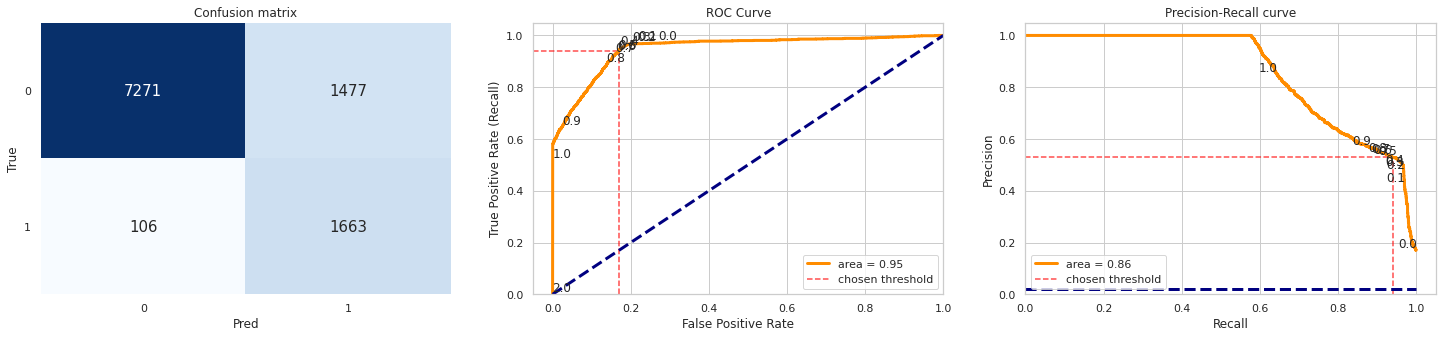

In [ ]:
evaluate_model(y_test,pred_gdsr_nn_ENN,predicted_prob_gdsr_nn_ENN, figsize=(25,5))

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=1)

learning_rate = ['constant', 'invscaling', 'adaptive']

N_MLP_ENN = Pipeline([
         ('smttmk', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
         ('clf', MLPClassifier(hidden_layer_sizes=(46,32,2),max_iter=1100,early_stopping=True))])

pipe_grid_MLP_ENN = [
             {'smttmk': [SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))],
             'clf':[MLPClassifier(hidden_layer_sizes=(46,32,2),max_iter=1100,early_stopping=True)],
             'clf__learning_rate' : learning_rate}]
              
scaled_x_MLP = normalize_data(X_train)

gd_sr_MLP1_ENN = GridSearchCV(estimator=N_MLP_ENN,
                       param_grid=pipe_grid_MLP_ENN,
                       cv=kf,
                       scoring='accuracy',verbose=3).fit(scaled_x_MLP, y_train)

In [ ]:
scaled_x_text = normalize_data(X_test)
pred_gs_MLP_ENN = gd_sr_MLP1_ENN.predict(scaled_x_text)

predicted_prob_gs_MLP_ENN = gd_sr_MLP1_ENN.predict_proba(scaled_x_text)[:,1]
predicted_prob_gs_MLP_ENN

print('--- GridSearchCV ---')
print("Best Model parameters:", gd_sr_MLP1_ENN.best_params_)
print("Best Model mean Accuracy:", round(gd_sr_MLP1_ENN.best_score_, 2))

In [ ]:
y_train_mlp1 = gd_sr_MLP1_ENN.predict(scaled_x_MLP)
print("Accuracy on training set : ", accuracy_score(y_train_mlp1,y_train))
print("Accuracy on test set : ", accuracy_score(pred_gs_MLP_ENN,y_test))

In [ ]:
evaluate_model(y_test,pred_gs_MLP_ENN,predicted_prob_gs_MLP_ENN, figsize=(25,5))

# Plotting Feature Importance

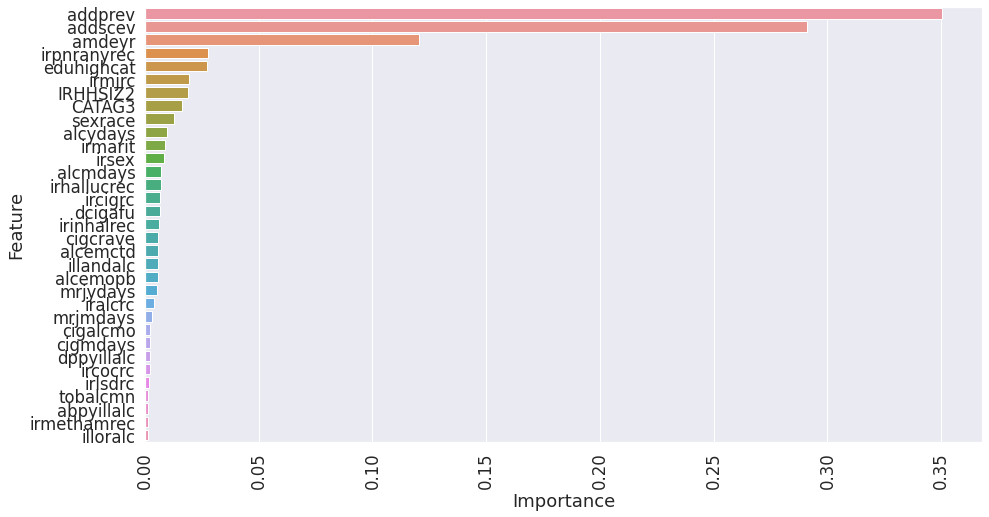

In [ ]:
plt.figure(figsize=(15,8))
important_feature = pd.DataFrame({'Importance' : gd_sr_RF_ENN.best_estimator_['clf'].feature_importances_,'Feature':X_train.columns}).sort_values(by='Importance',ascending=False)

sns.set(font_scale=1.50)
plt.xticks(rotation=90)
sns.barplot(x='Importance',y='Feature',data=important_feature[0:33])

## **Combine Graph**

In [ ]:
def Combine_graph(y_test, predicted, predicted_prob, predicted_2, predicted_prob_2, predicted_3, predicted_prob_3,
                  predicted_4, predicted_prob_4, predicted_5, predicted_prob_5, show_thresholds=True, figsize=(25,5)):
    classes = np.unique(y_test)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
   
    ## Accuray e AUC
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob)
    #print("Accuracy (overall correct predictions):",  round(accuracy,2))
    #print("Auc:", round(auc,2))
   
    ## Precision e Recall
    recall = metrics.recall_score(y_test, predicted)  #= true 1s / all 1s in test (got and missed)
    precision = metrics.precision_score(y_test, predicted)  #= true 1s / all 1s predicted (true 1s + false 1s)
    f1 = metrics.f1_score(y_test, predicted)  #=2 * (precision * recall) / (precision + recall)
    #print("Recall (all 1s predicted right):", round(recall,2))  #true positive rate, how many 1s I got
    #print("Precision (confidence when predicting a 1):", round(precision,2))  #how many 1s were really 1s
    #print("F1 score:", round(f1,2))
    #print("Detail:")
    #print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in classes]))
       
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
    #sns.heatmap(cm, annot=True, annot_kws={"size":15}, fmt='d', ax=ax[0], cmap=plt.cm.Blues, cbar=False)
    #ax[0].set(xlabel="Pred", ylabel="True", title="Confusion matrix")
    #ax[0].set_yticklabels(labels=classes, rotation=0)
   
    ## Plot roc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)  #SVM
    fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, predicted_prob_2) #KNN
    fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test, predicted_prob_3) #GBM
    fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(y_test, predicted_prob_4) #RF
    fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test, predicted_prob_5) #NN
    ax[1].plot(fpr, tpr, color='darkorange', lw=3, label='SVM area = %0.2f' % metrics.auc(fpr, tpr))
    ax[1].plot(fpr, tpr, color='purple', lw=3, label='KNN area = %0.2f' % metrics.auc(fpr_2, tpr_2))
    ax[1].plot(fpr, tpr, color='darkgreen', lw=3, label='GBM area = %0.2f' % metrics.auc(fpr_3, tpr_3))
    ax[1].plot(fpr, tpr, color='lightgreen', lw=3, label='RF area = %0.2f' % metrics.auc(fpr_4, tpr_4))
    ax[1].plot(fpr, tpr, color='darkred', lw=3, label='NN area = %0.2f' % metrics.auc(fpr_5, tpr_5))
    ax[1].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[1].hlines(y=recall, xmin=-0.05, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[1].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
    ax[1].set(xlim=[-0.05,1], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="ROC Curve")    
    ax[1].legend(loc="lower right")
    ax[1].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[1].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), textcoords='offset points', ha='left', va='bottom')
                thres_in_plot.append(t)
            else:
                next
   
    ## Plot precision-recall curve
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob) #SVM
    precisions_2, recalls_2, thresholds_2 = metrics.precision_recall_curve(y_test, predicted_prob_2) #KNN
    precisions_3, recalls_3, thresholds_3 = metrics.precision_recall_curve(y_test, predicted_prob_3) #GBM
    precisions_4, recalls_4, thresholds_4 = metrics.precision_recall_curve(y_test, predicted_prob_4) #RF
    precisions_5, recalls_5, thresholds_5 = metrics.precision_recall_curve(y_test, predicted_prob_5) #NN
    ax[2].plot(recalls, precisions, color='darkorange', lw=3, label='SVM area = %0.2f' % metrics.auc(recalls, precisions))
    ax[2].plot(recalls, precisions, color='purple', lw=3, label='KNN area = %0.2f' % metrics.auc(recalls_2, precisions_2))
    ax[2].plot(recalls, precisions, color='darkgreen', lw=3, label='GBM area = %0.2f' % metrics.auc(recalls_3, precisions_3))
    ax[2].plot(recalls, precisions, color='lightgreen', lw=3, label='RF area = %0.2f' % metrics.auc(recalls_4, precisions_4))
    ax[2].plot(recalls, precisions, color='darkred', lw=3, label='NN area = %0.2f' % metrics.auc(recalls_5, precisions_5))
    ax[2].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
    ax[2].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[2].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
    ax[2].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[2].legend(loc="lower left")
    ax[2].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[2].annotate(np.round(t,1), xy=(recalls[i],precisions[i]), xytext=(recalls[i],precisions[i]), textcoords='offset points', ha='right', va='bottom')
                thres_in_plot.append(t)
            else:
                next
    plt.show()

In [ ]:
Combine_graph(y_test, pred_SVC_ENN, pred_prob_SVC_ENN, pred_KNN_ENN, pred_prob_KNN_ENN,
              pred_gdsr_GBM_ENN,pred_prob_gdsr_GBM_ENN, pred_gdsr_rf_ENN, pred_prob_gdsr_rf_ENN,
              pred_gdsr_nn_ENN,predicted_prob_gdsr_nn_ENN, figsize=(25,5))